In [79]:
# This reloads the extension if already loaded - Everytime you update the .py files, re-run this cell!
%reload_ext autoreload
# Automatically reloads modules before executing code OR makes Jupyter reload your .py files whenever you run a cell.
%autoreload 2

In [26]:
# Importing all of the required python packages
import sys
import os

In [80]:
# Setting up the folder paths.
sys.path.append('./lib')

# Import resuable code (scripts) within .py files.
from data_loader import load_csv, save_df_to_csv
from data_wrangle import add_cols, df_formater, remove_cols, remove_rows, col_name_changer, df_split

Section: Loading and converting data sets into DataFrames.

In [28]:
df_indicators = load_csv('./data/raw/U.S._Chronic_Disease_Indicators.csv')
# print(df.head())

In [29]:
# df2 = load_csv('./data/raw/US_Census_Data_2022_v01.csv')
# print(df2.head())

In [30]:
df_census = load_csv('./data/raw/US_Census_Data_2022_v03_transpose.csv')
# display(df3.head())

# **Section: Data Wrangling**

Census DataFrame: df_census
1. Adding the 'State' column to the dataframe.
2. Adding the correct state name to the newly created State column.
3. Removing blank columns
4. Removing blank rows
5. Split DataFrame into 2 separate DataFrames, 1 with state and 1 with city, state
6. Saves both datasets as 2 csv files at filepath: data/processed/

In [31]:
col_names = ['State']
df_census_temp0 = add_cols(df_census, col_names)
# display(df_census_temp0)    # For debugging only - comment out when not needed.

In [32]:
df_census_temp1 = df_formater(df_census_temp0)
# display(df_census_temp1)    # For debugging only - comment out when not needed.

In [36]:
#df_census_temp2 = remove_cols(df_census_temp1)
display(df_census_temp2)    # For debugging only - comment out when not needed.

In [37]:
#df_census_temp3 = remove_rows(df_census_temp2)
display(df_census_temp3)    # For debugging only - comment out when not needed.

In [ ]:
og_string = "!!"
new_string = " -- "
df_census_temp4 = col_name_changer(df_census_temp3, og_string, new_string)
# display(df_census_temp4)     # For debugging only - comment out when not needed.

In [ ]:
df_state_only, df_state_city = df_split(df_census_temp4)
# display(df_state_only)    # For debugging only - comment out when not needed.
# display(df_state_city)    # For debugging only - comment out when not needed.

In [ ]:
save_df_to_csv(df_state_only, './data/processed/US_Census_Data_2022_state_only.csv')

In [ ]:
save_df_to_csv(df_state_city, './data/processed/US_Census_Data_2022_city_state.csv')

# **Section: Data Pre-processing and Exploratory Data Analysis**

In [81]:
# Importing visual.py for creating the EDA visualizations

from lib import visual as vis
import pandas as pd
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Loading final dataframe

df1 = pd.read_csv ('./data/processed/Final_dataset.csv')
df = df1.copy() # Creating a copy to avoid changing the underlying dataset

In [4]:
# Confirming the number of rows and columns

df.shape

(50, 326)

In [6]:
# Obtaining detailed information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 326 entries, State to moe - Mortgage Costs 30 precent or more of Income
dtypes: float64(284), int64(1), object(41)
memory usage: 127.5+ KB


In [5]:
# Generating descriptive statistics for numeric variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Males - Arthritis-DataValue,50.0,24.156000,3.451954,18.0,21.825,23.70,26.300,35.7
Males - Asthma-DataValue,50.0,7.616000,1.214262,4.8,6.825,7.70,8.250,11.4
Males - Bill Payment Instability-DataValue,34.0,9.441176,2.003046,5.7,8.000,9.25,10.725,13.2
Males - COPD-DataValue,50.0,6.290000,1.819537,3.3,4.900,6.00,7.025,12.9
Males - Diabetes-DataValue,50.0,12.174000,1.957071,8.5,10.700,12.00,13.300,17.3
...,...,...,...,...,...,...,...,...
moe - Pop 18 and Over Below Poverty,50.0,0.448000,0.221535,0.1,0.300,0.40,0.600,1.2
moe - Households With No Vehicles,50.0,0.384000,0.183348,0.1,0.300,0.30,0.500,0.9
moe - Households With 1 and Over Vehicles,50.0,0.384000,0.183348,0.1,0.300,0.30,0.500,0.9
moe - Mortgage Costs less than 30 percent Income,50.0,1.046000,0.530771,0.3,0.600,0.85,1.300,2.4


In [8]:
# Checking a fequency-based summary of the object data types
df.describe(include="object").T

,count,unique,top,freq
State,50,50,Alabama,1
est - Total Pop,50,50,"5,074,296",1
est - Pop 25 and Over - Educated,50,50,"3,474,924",1
est - Civilian Pop 18 and Over,50,50,"3,946,788",1
est - Pop 16 and Over,50,50,"4,093,740",1
est - Workers 16 and Over,50,50,"2,259,733",1
est - Households With Income,50,50,"2,016,448",1
est - Median Household Income,50,50,"59,674",1
est - Mean Household Earnings,50,50,"86,749",1
est - Mean Social Security Income,50,50,"21,488",1


In [53]:
# select object columns except State
obj_cols = df.select_dtypes(include="object").columns.drop("State")

# convert to numeric (remove commas, coerce errors to NaN)
df[obj_cols] = df[obj_cols].apply(
    lambda col: pd.to_numeric(col.str.replace(",", ""), errors="coerce")
)

In [59]:
df.shape

(50, 326)

In [55]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [56]:
# Identifying the percent of missing values in the dataset

df.isnull().sum().sum() / df.size

np.float64(0.24049079754601227)

**Observation:**
- Approximate 23% of the entire dataset is missing

In [15]:
# 1. Calculate the percentage of missing values
missing_pct = df.isnull().mean() * 100

# 2. Define the buckets based on your criteria
# We create a dictionary where the key is the Sheet Name and the value is the filtered data
report_data = {
    "Safe_0-5_pct": missing_pct[(missing_pct >= 0) & (missing_pct <= 5)],
    "Attention_5-20_pct": missing_pct[(missing_pct > 5) & (missing_pct <= 20)],
    "Risky_20-40_pct": missing_pct[(missing_pct > 20) & (missing_pct <= 40)],
    "High_Missing_Over_40": missing_pct[missing_pct > 40],
    "Near_Empty_Over_90": missing_pct[missing_pct > 90]
}

# 3. Export to Excel
file_name = "Missing_Value_Report.xlsx"

with pd.ExcelWriter(file_name) as writer:
    for sheet_name, data in report_data.items():
        # Convert the Series to a DataFrame and sort it
        df_category = data.reset_index()
        df_category.columns = ['Column_Name', 'Missing_Percentage']
        df_category = df_category.sort_values(by='Missing_Percentage', ascending=False)
        
        # Save to the specific sheet
        df_category.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Done! Your report '{file_name}' has been created in your current folder.")

Done! Your report 'Missing_Value_Report.xlsx' has been created in your current folder.


In [16]:
# Dropping columns that have more than 5% of missing values

threshold = 0.05  # 5%

cols_to_drop = df.columns[df.isna().mean() > threshold]

df = df.drop(columns=cols_to_drop)

df.shape

(50, 181)

In [76]:
# Dropping ...

def drop_columns(df, column_strings):
    """
        Searches for certain strings in column names and drops those columns
    
        Parameters
        ----------
        df : pandas.DataFrame
        columns_strings : list of strings to search for in the column names 
 
        Returns
        -------
        pandas.DataFrame
            A dataframe without the columns that had the strings specified
            
    """

    df_dropped = df.copy()
    for search_string in column_strings: 
        df_dropped = df_dropped.drop([col for col in df_dropped.columns if search_string in col], axis = 1)

    return df_dropped

cols_to_drop = ["White", "Black", "Hispanic", "Hawaiian or Pacific Islander",
                       "American Indian or Alaska Native", "Multiracial", "Asian", "ConfidenceLimit",
               "moe - "]
df = drop_columns(df, cols_to_drop)

# cols_to_drop = df.drop([col for col in df.columns if 'moe - ' in col], axis = 1)
# cols_to_drop2 = cols_to_drop.drop([col for col in cols_to_drop.columns if 'ConfidenceLimit' in col], axis = 1)
# race_list = ["White", "Black", "Hispanic", "Hawaiian or Pacific Islander",
#             "American Indian or Alaska Native", "Multiracial", "Asian"]

# cols_to_drop3 = cols_to_drop2.drop(columns= race_list, axis = 1)




In [77]:
df.columns

Index(['State', 'Males - Arthritis-DataValue', 'Males - Asthma-DataValue',
       'Males - Bill Payment Instability-DataValue', 'Males - COPD-DataValue',
       'Males - Diabetes-DataValue', 'Males - Obesity-DataValue',
       'Males - Transportation Instability-DataValue',
       'Females - Arthritis-DataValue', 'Females - Asthma-DataValue',
       'Females - Bill Payment Instability-DataValue',
       'Females - COPD-DataValue', 'Females - Diabetes-DataValue',
       'Females - Obesity-DataValue',
       'Females - Transportation Instability-DataValue',
       'Overall - Arthritis-DataValue', 'Overall - Asthma-DataValue',
       'Overall - Bill Payment Instability-DataValue',
       'Overall - COPD-DataValue', 'Overall - Diabetes-DataValue',
       'Overall - Obesity-DataValue',
       'Overall - Transportation Instability-DataValue', 'est - Total Pop',
       'est - Total Pop - Male - %', 'est - Total Pop - Female - %',
       'est - Total Pop 18 and Over - %',
       'est - Total P

C:\Users\mfebu\projects\lib\visual.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  


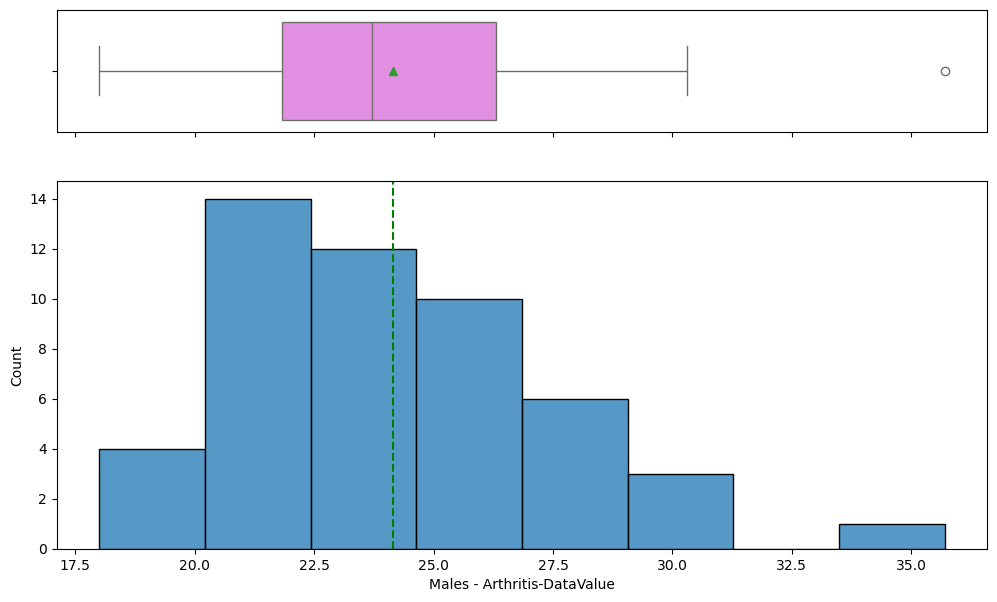

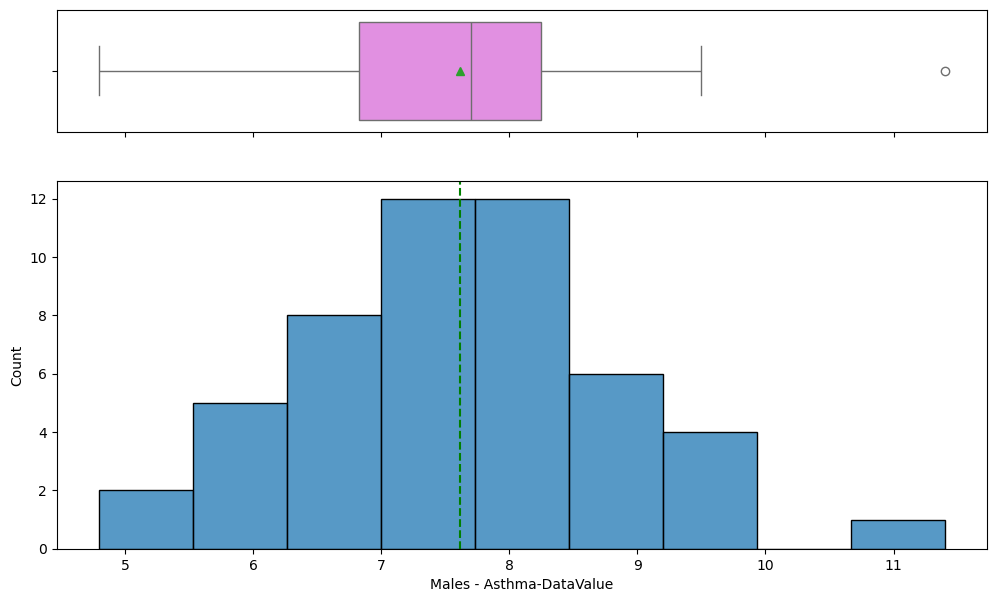

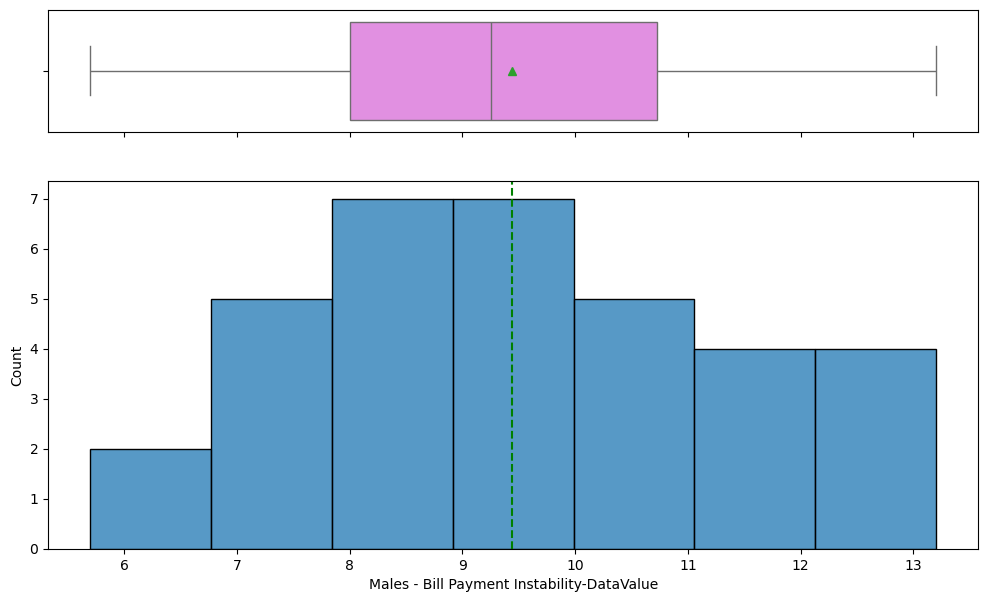

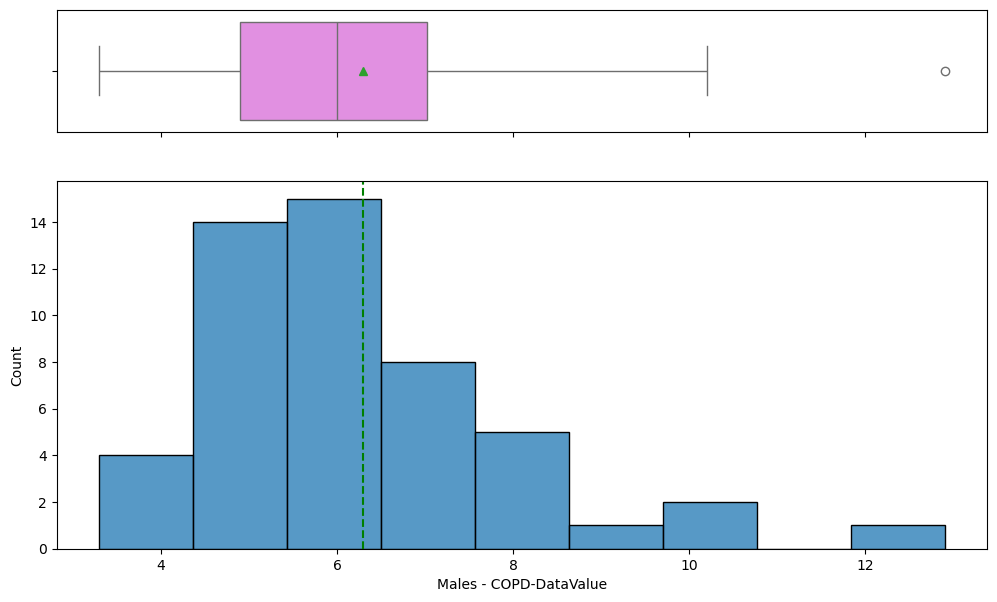

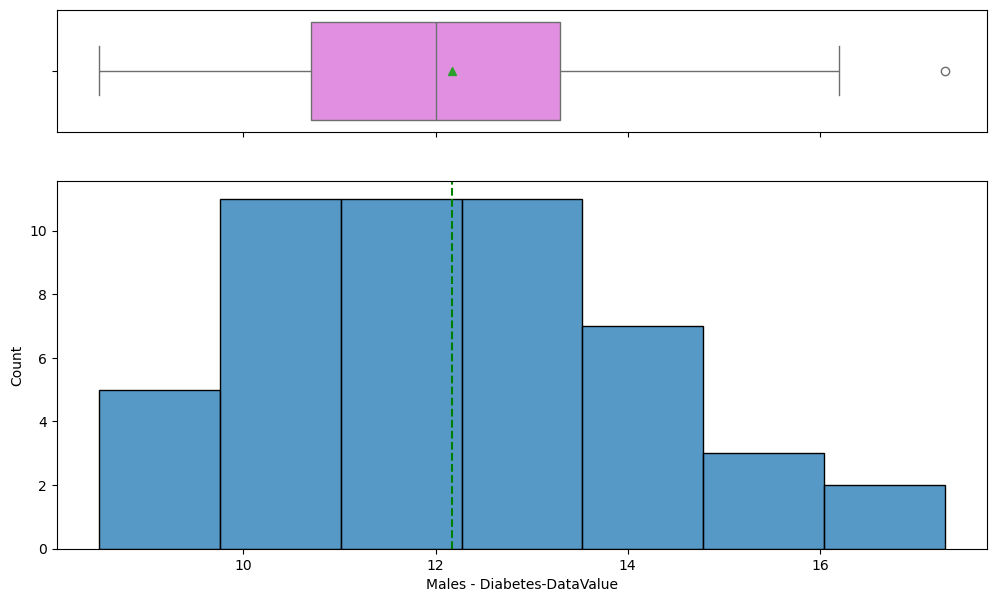

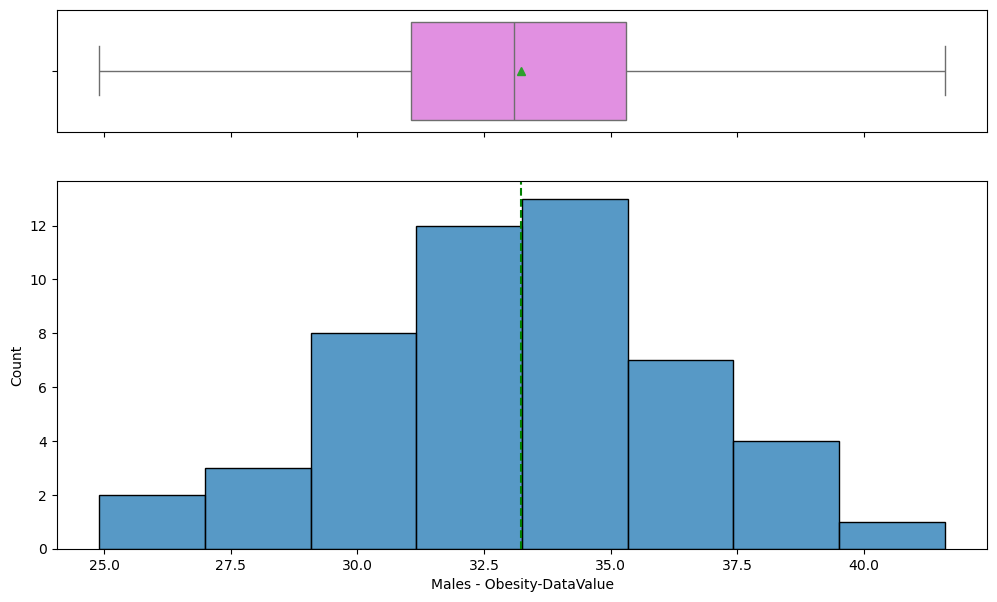

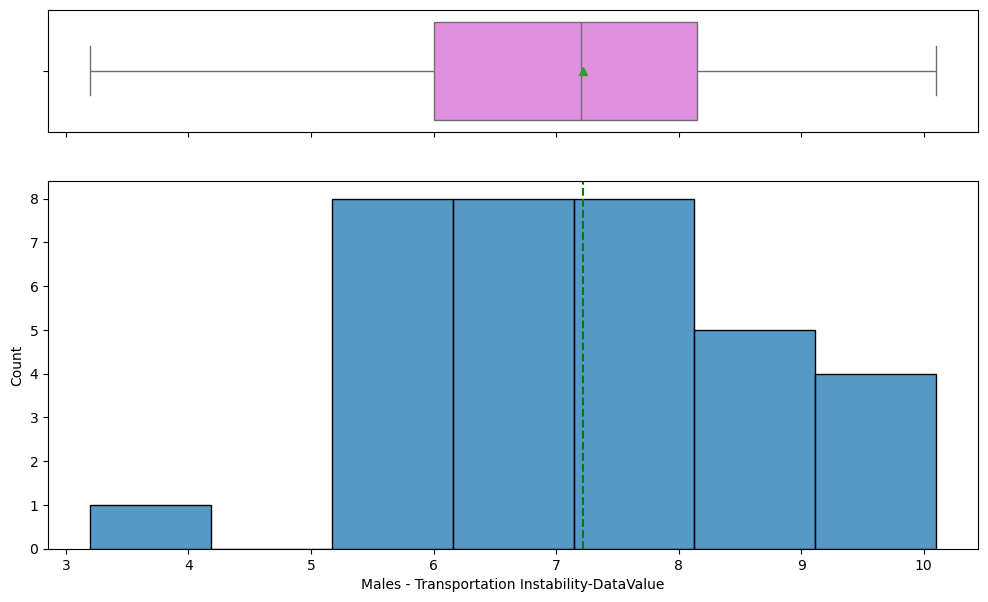

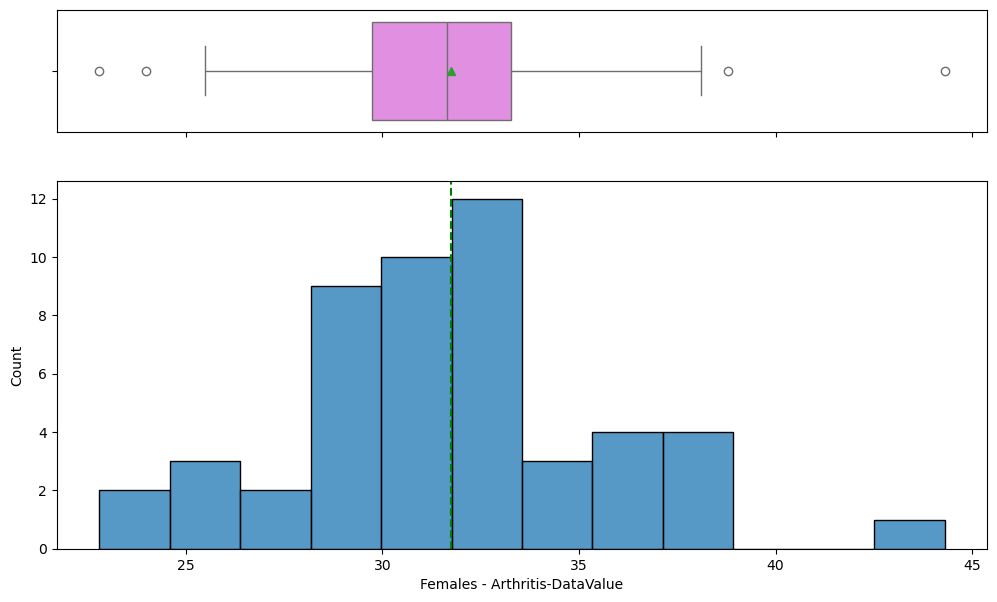

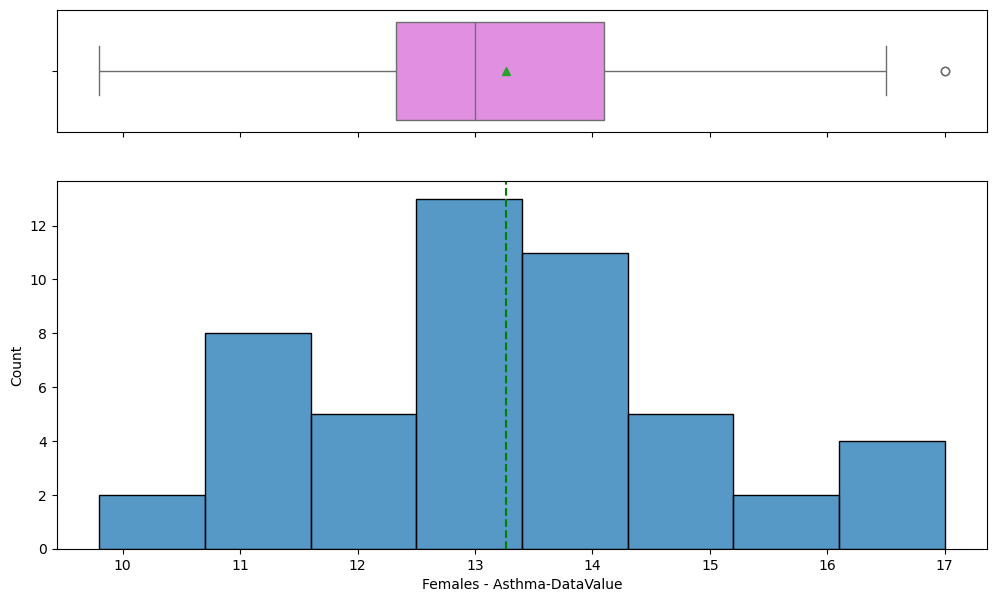

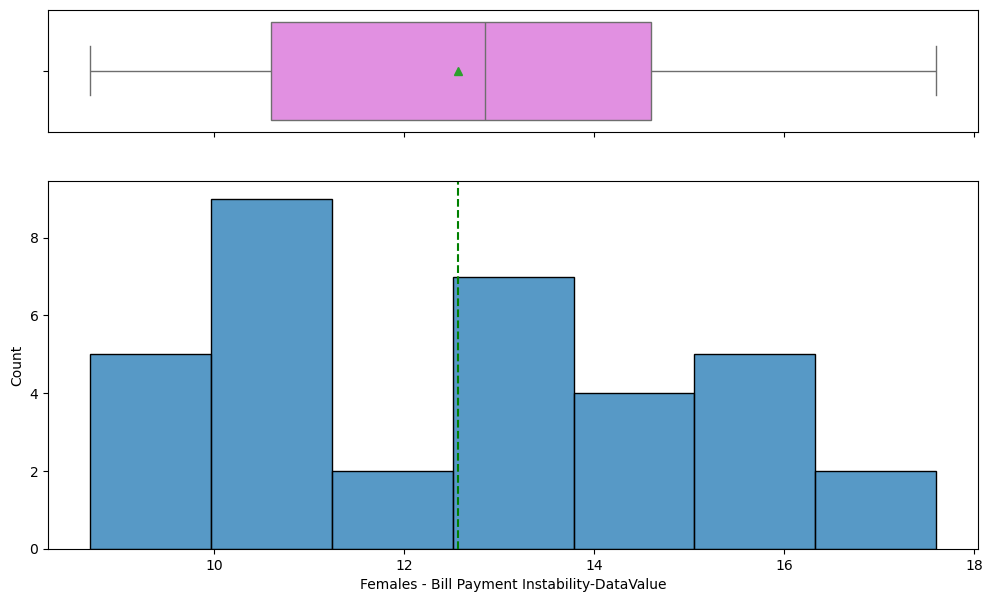

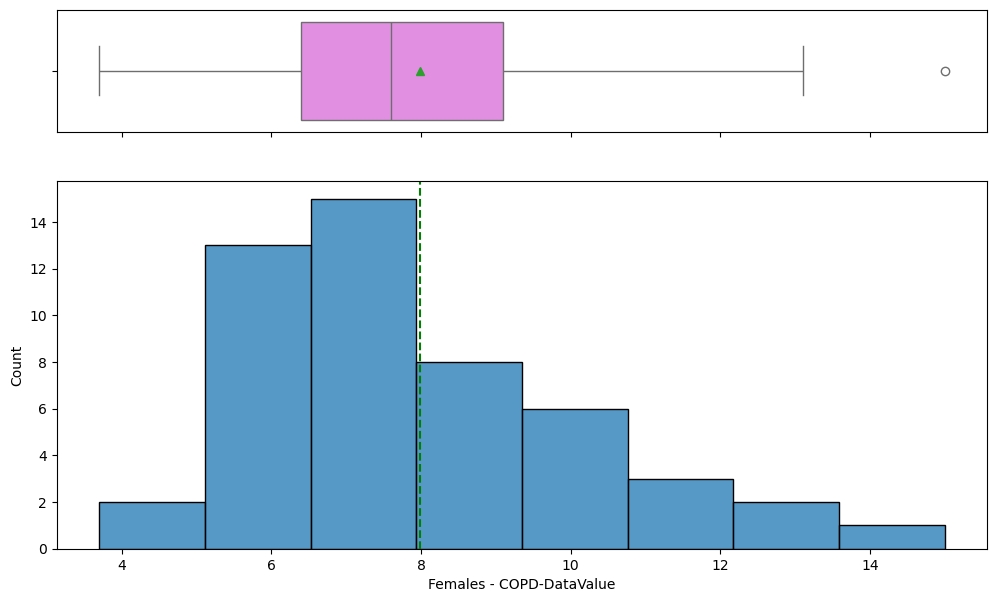

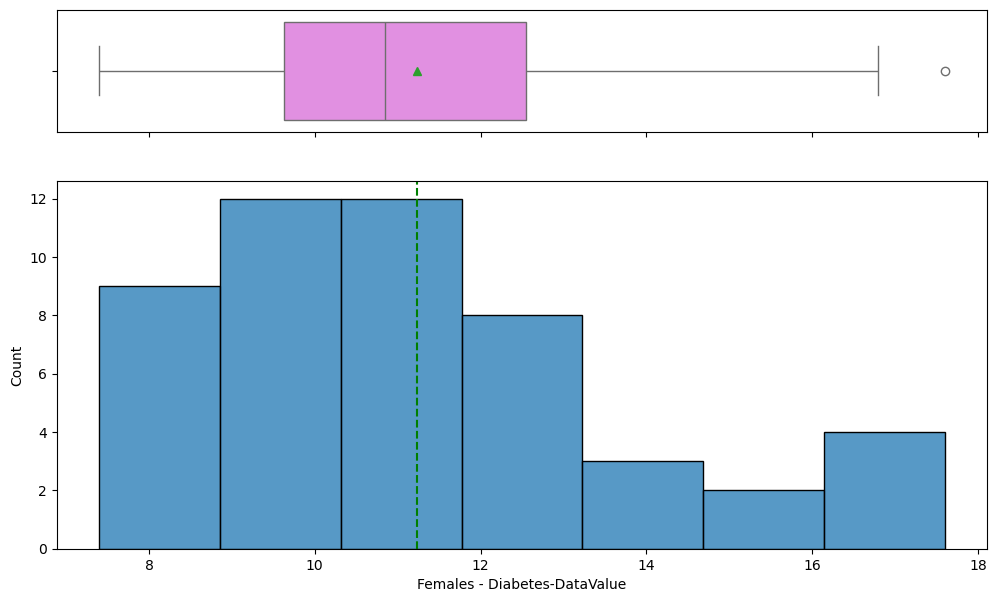

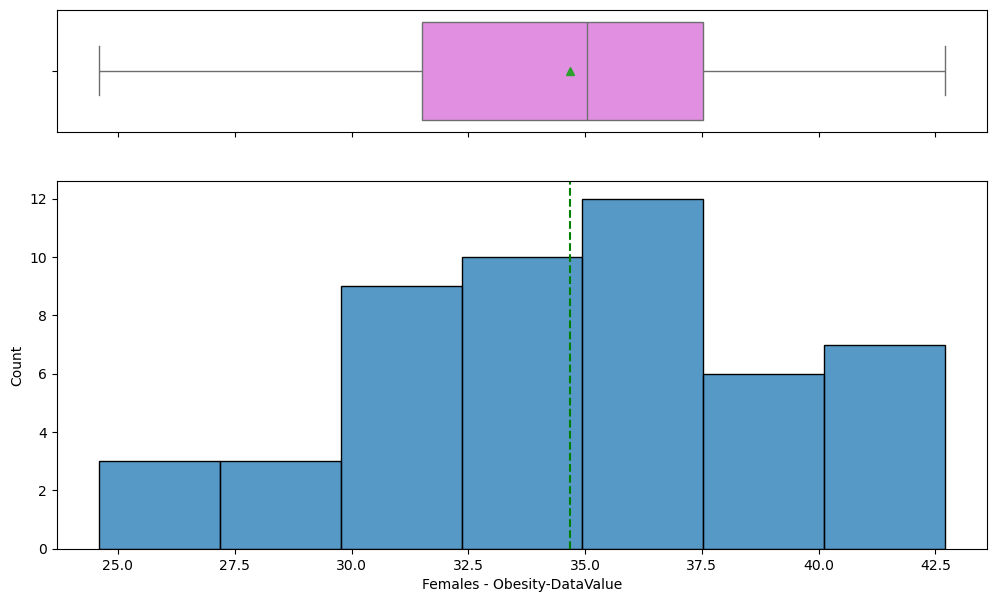

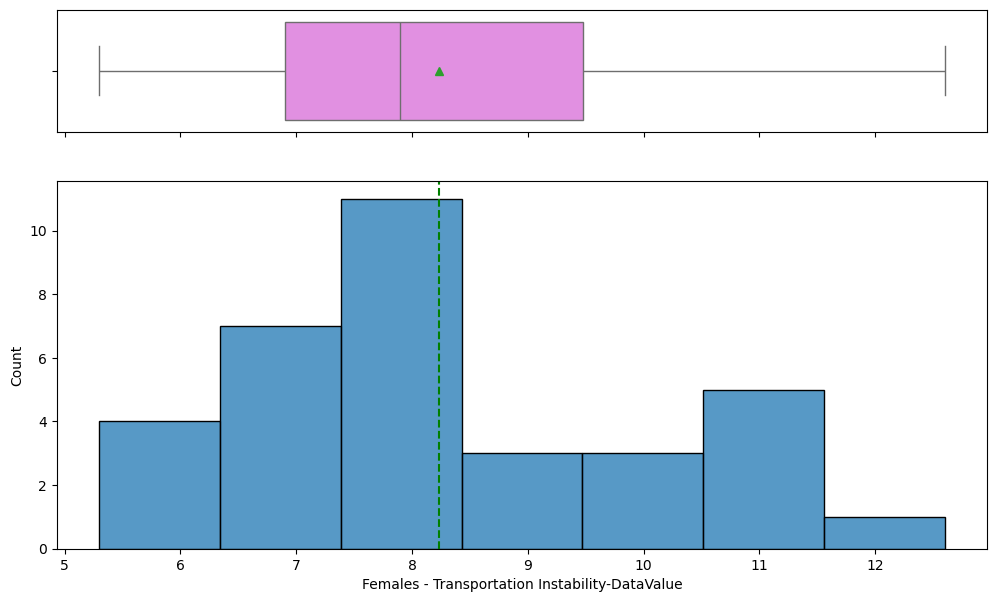

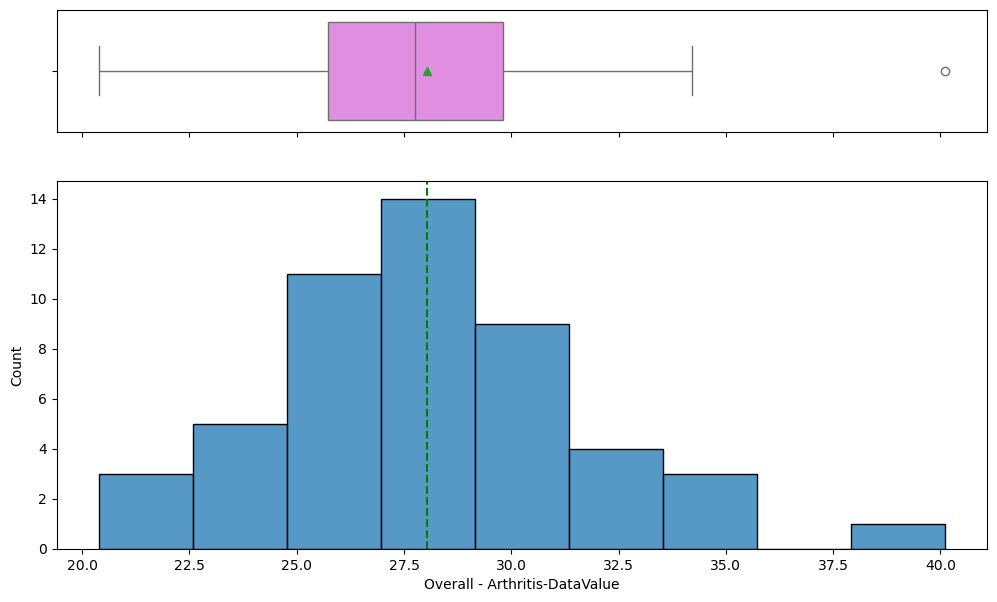

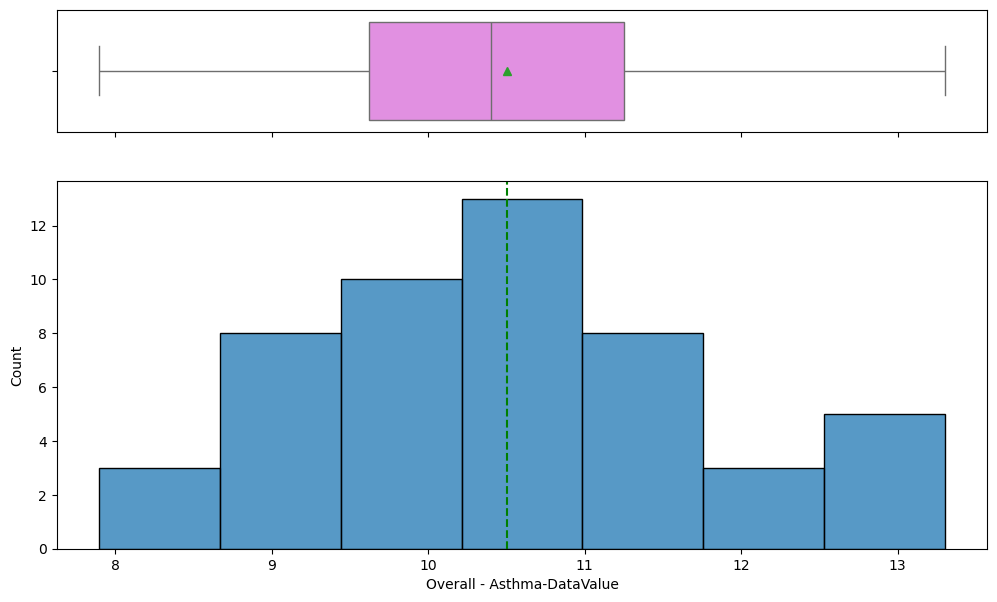

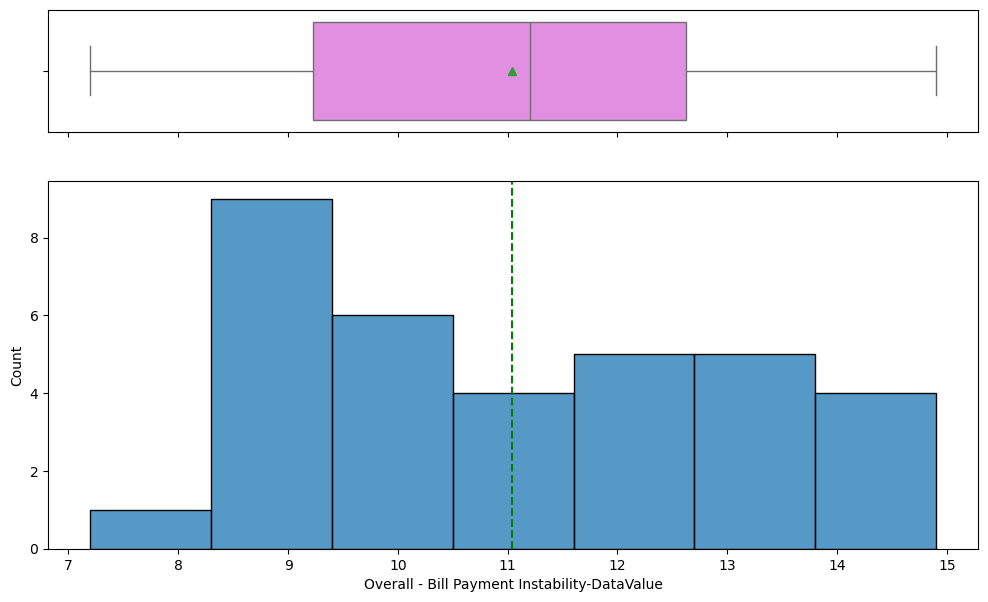

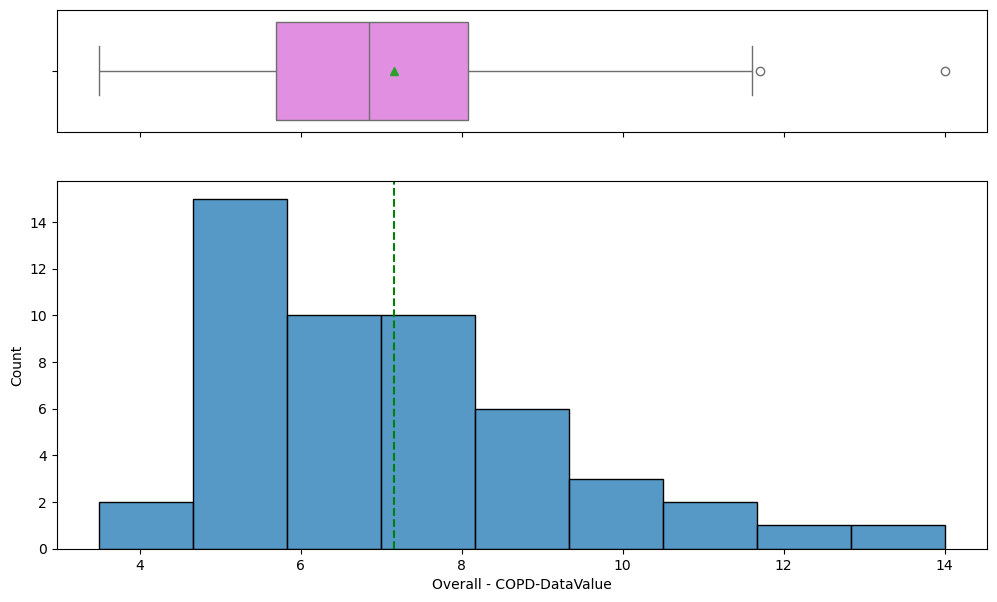

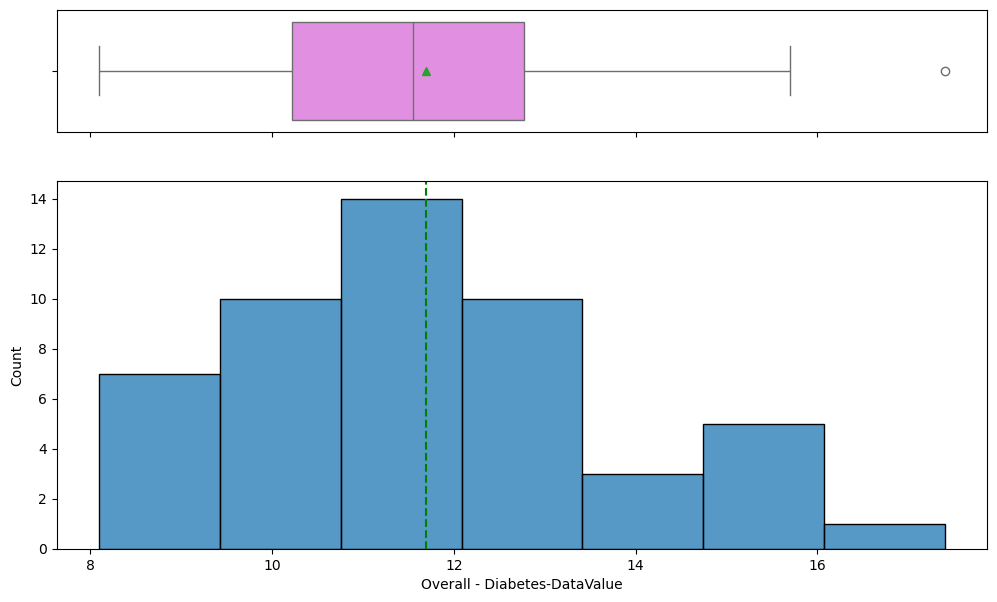

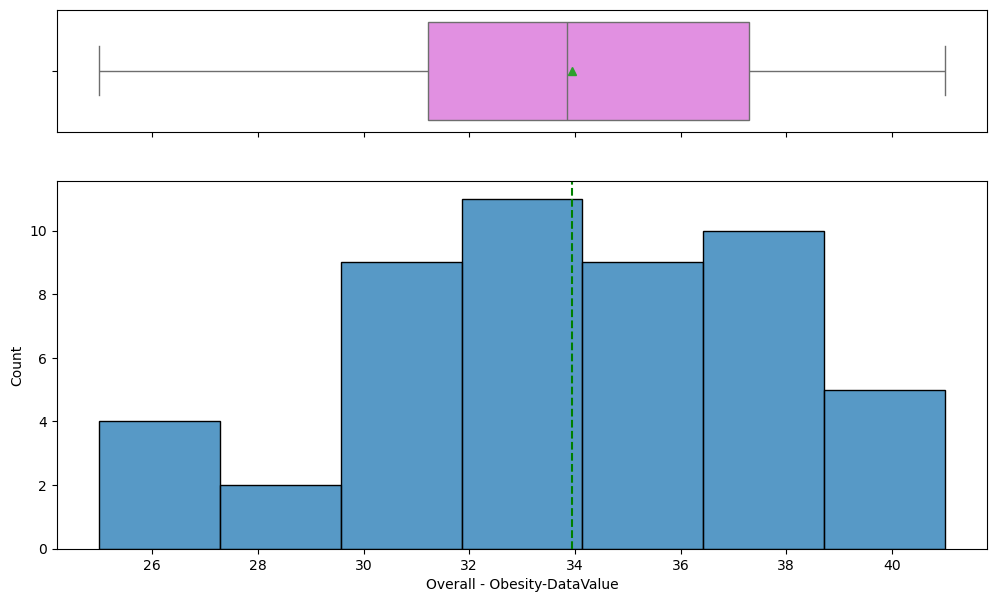

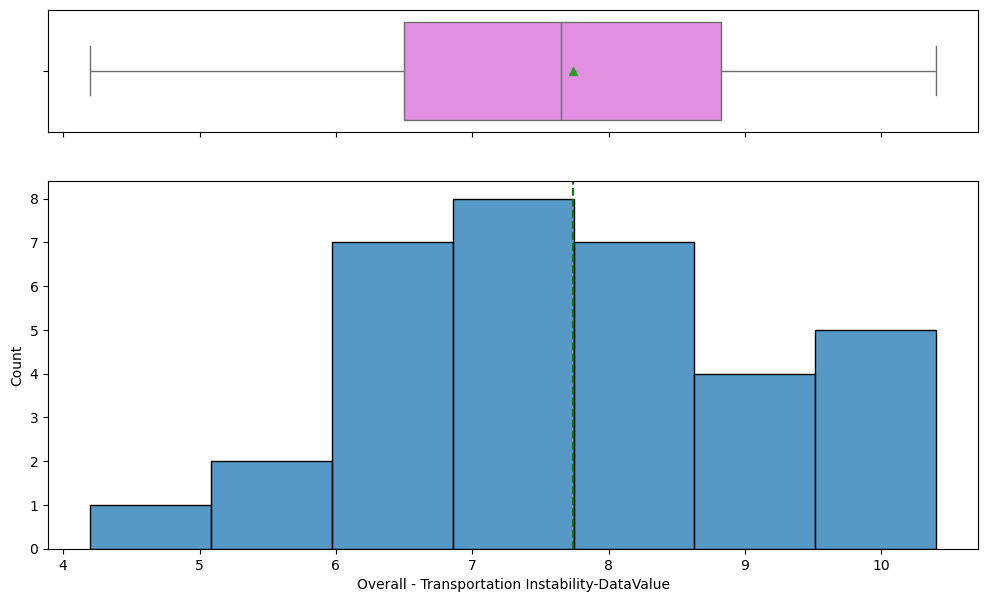

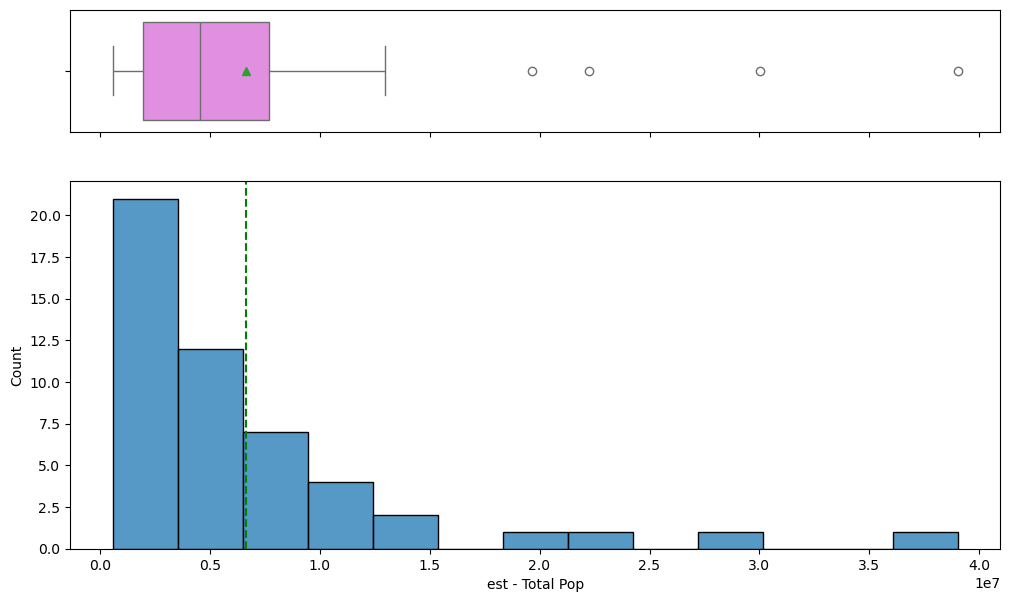

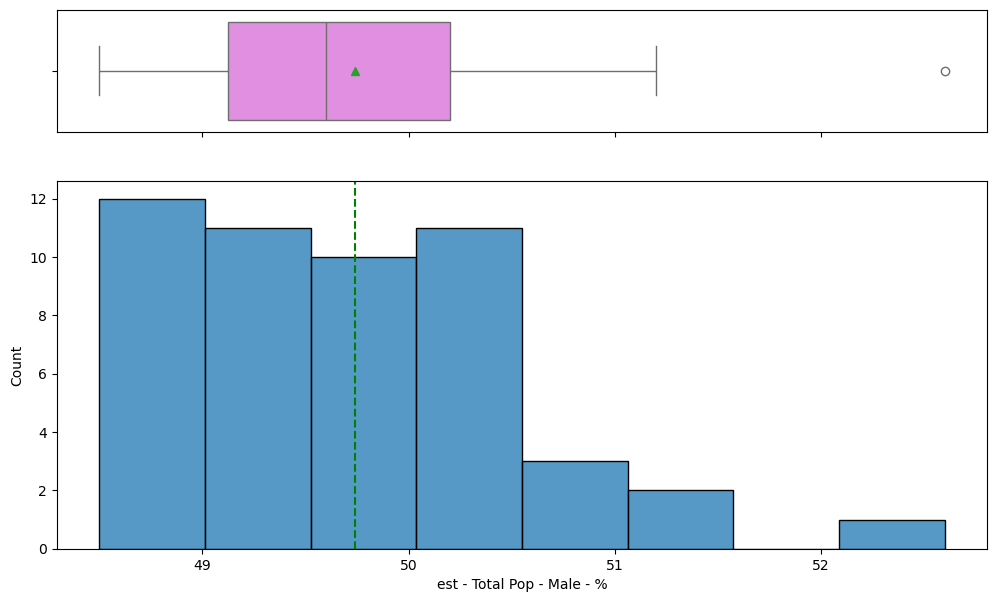

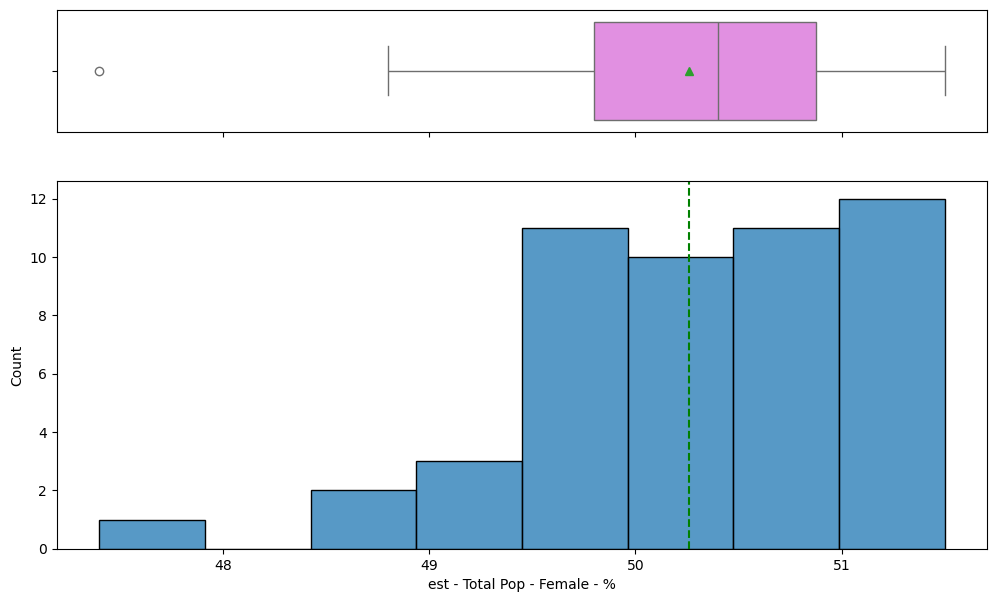

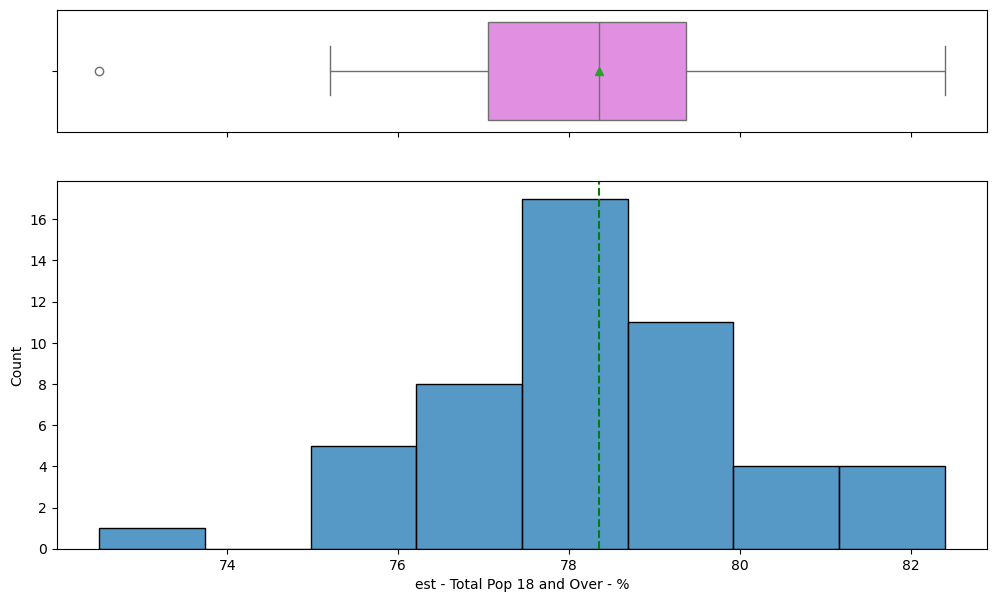

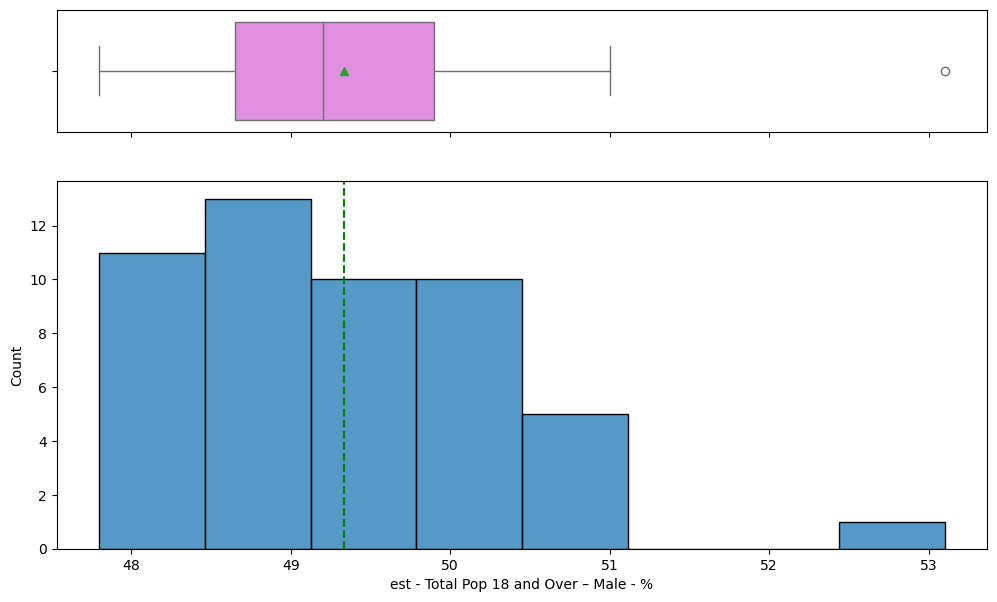

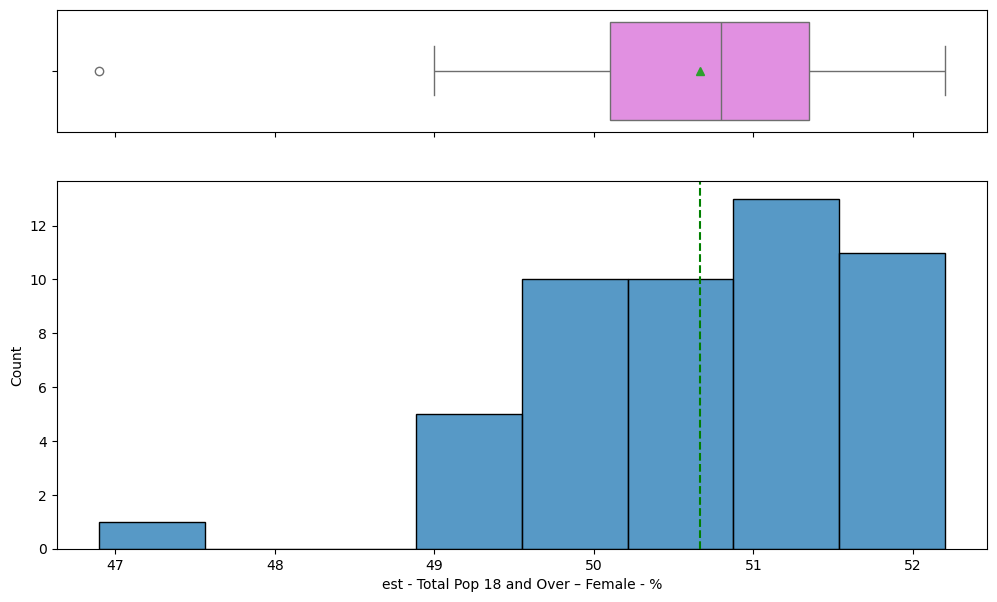

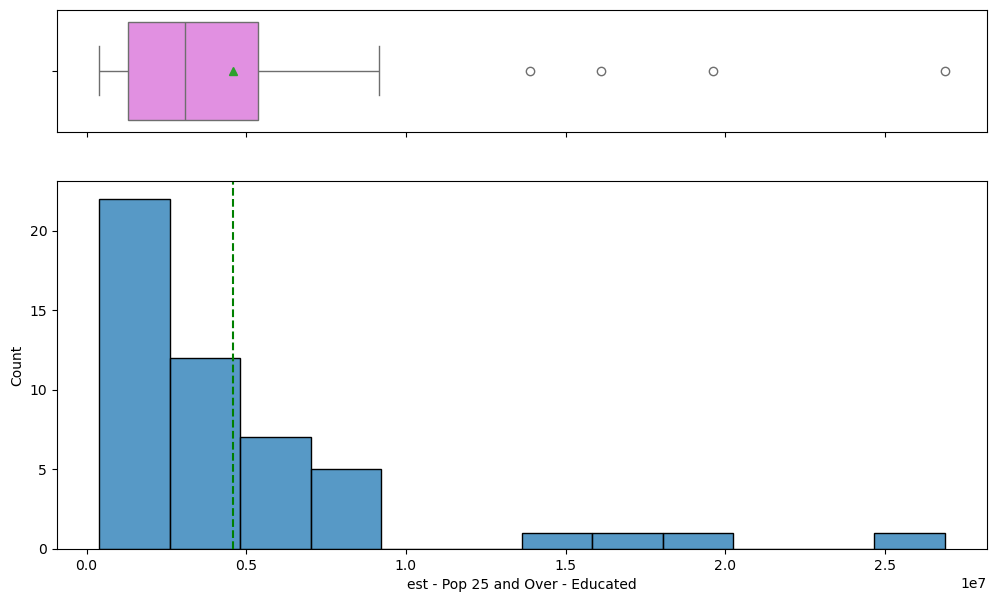

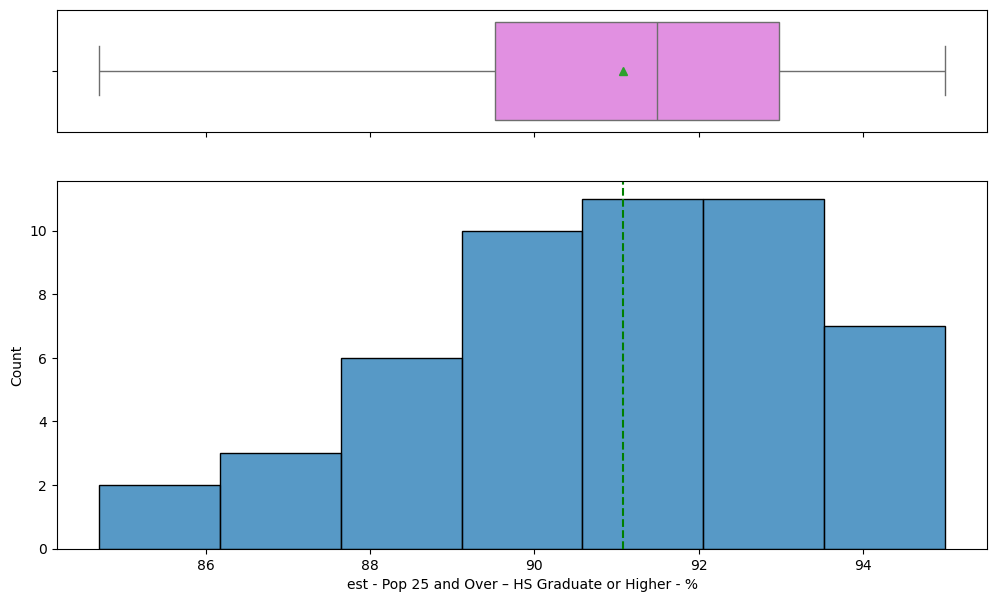

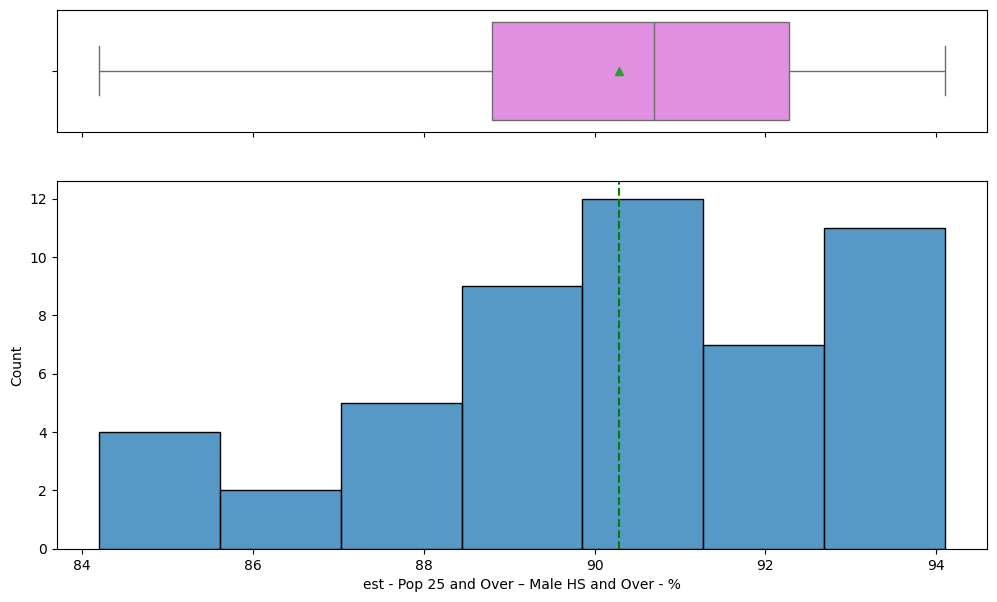

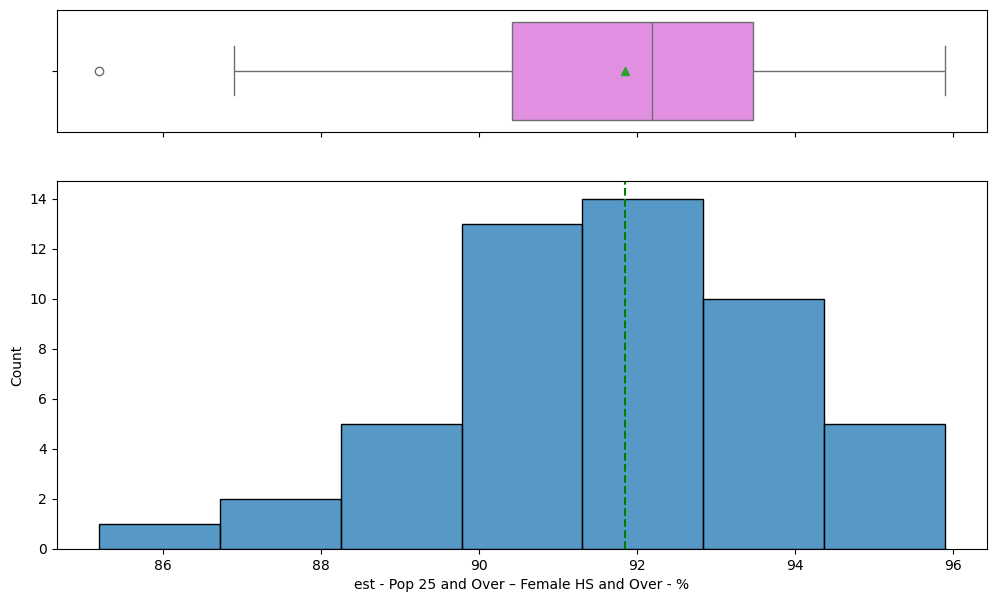

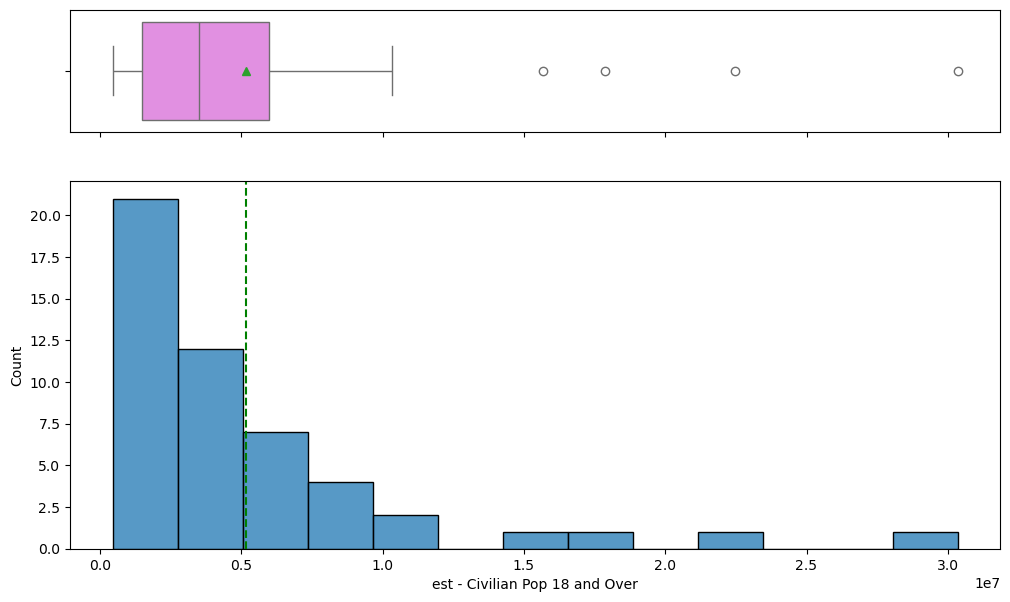

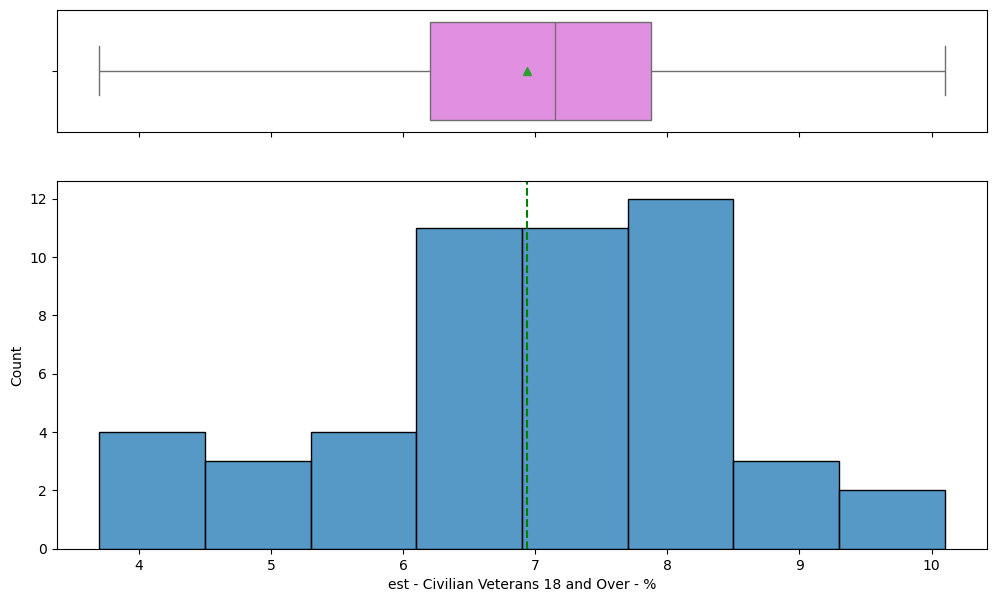

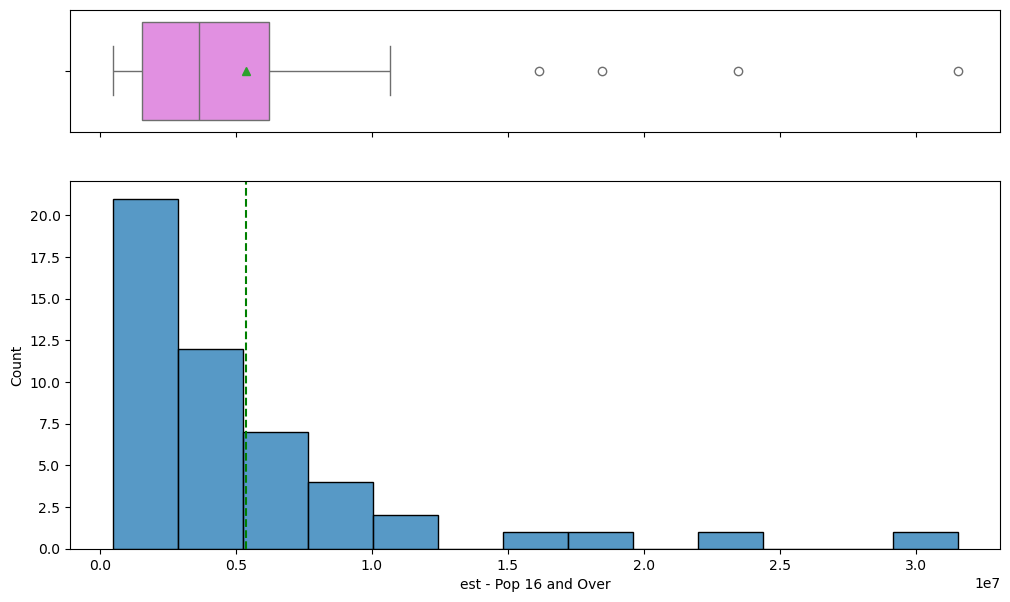

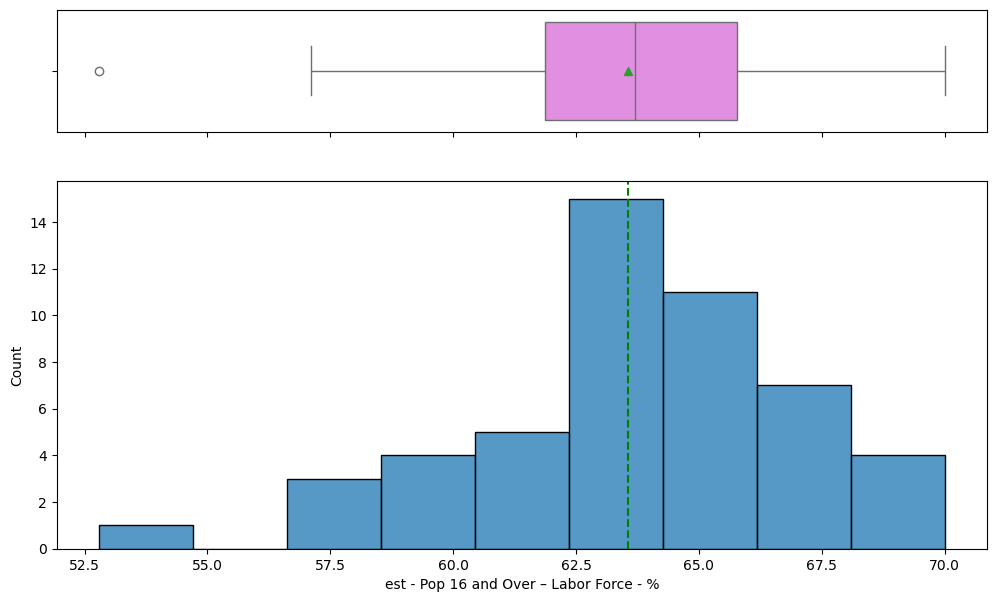

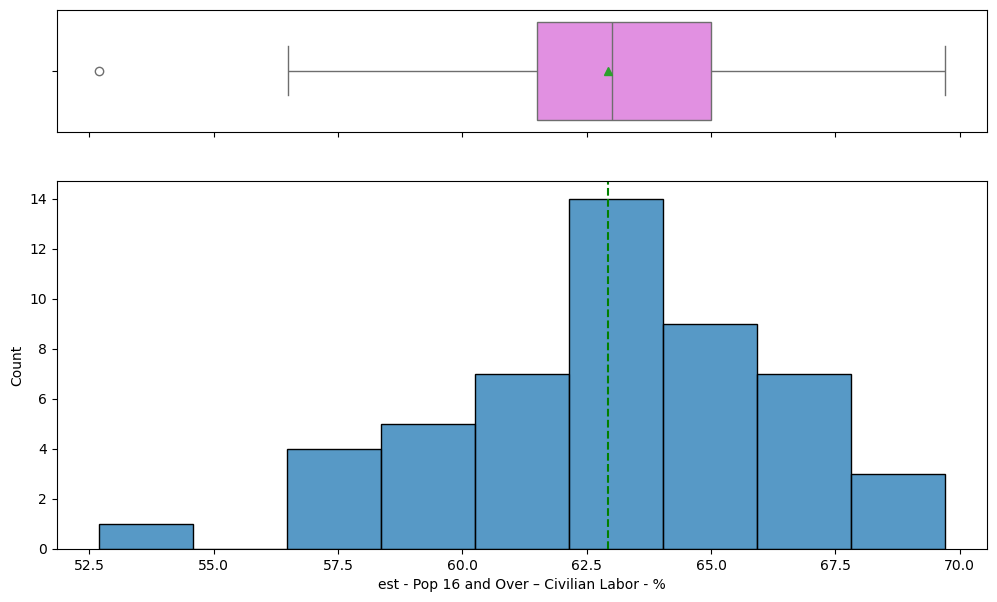

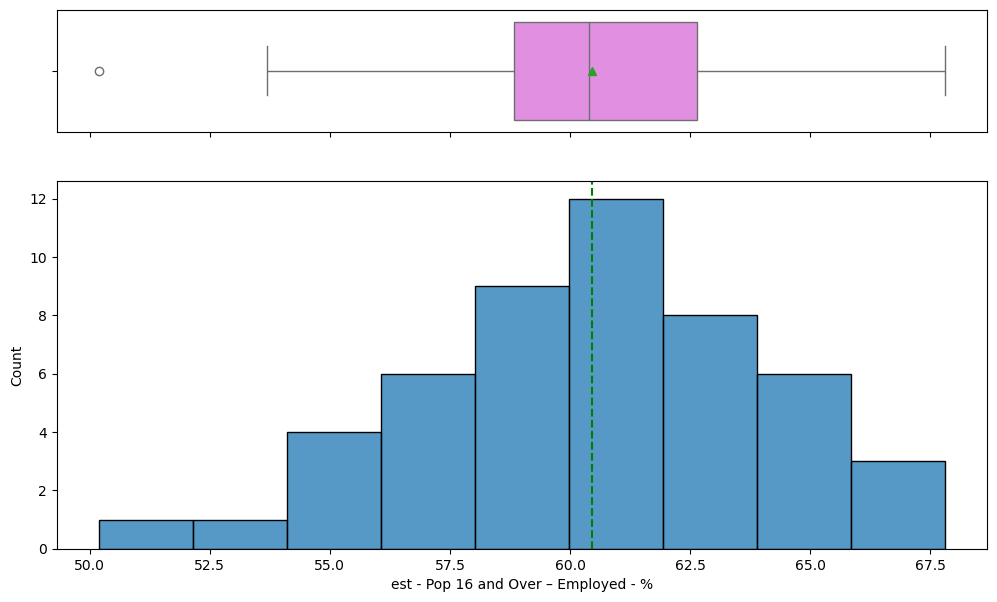

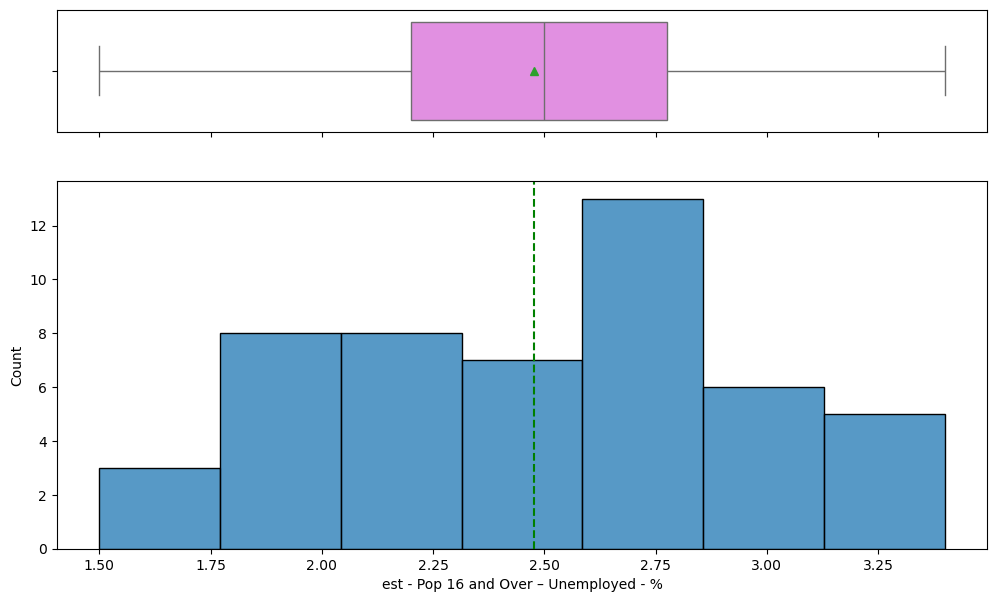

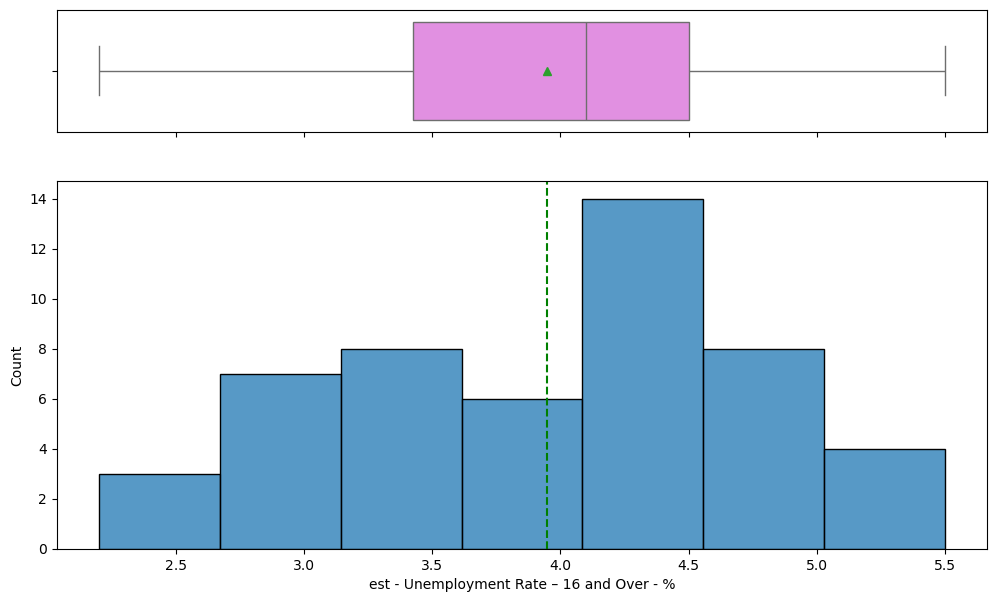

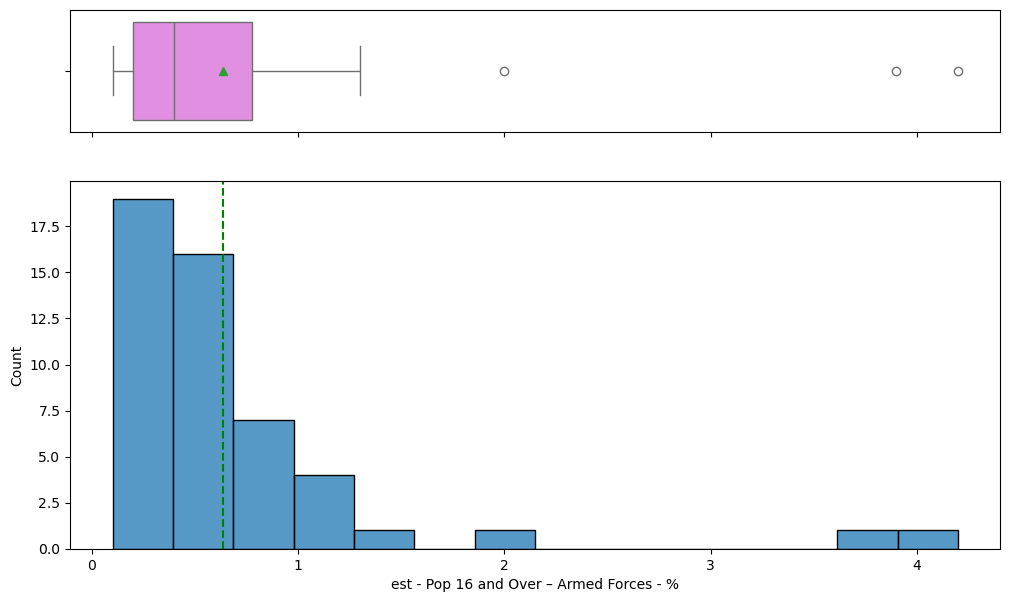

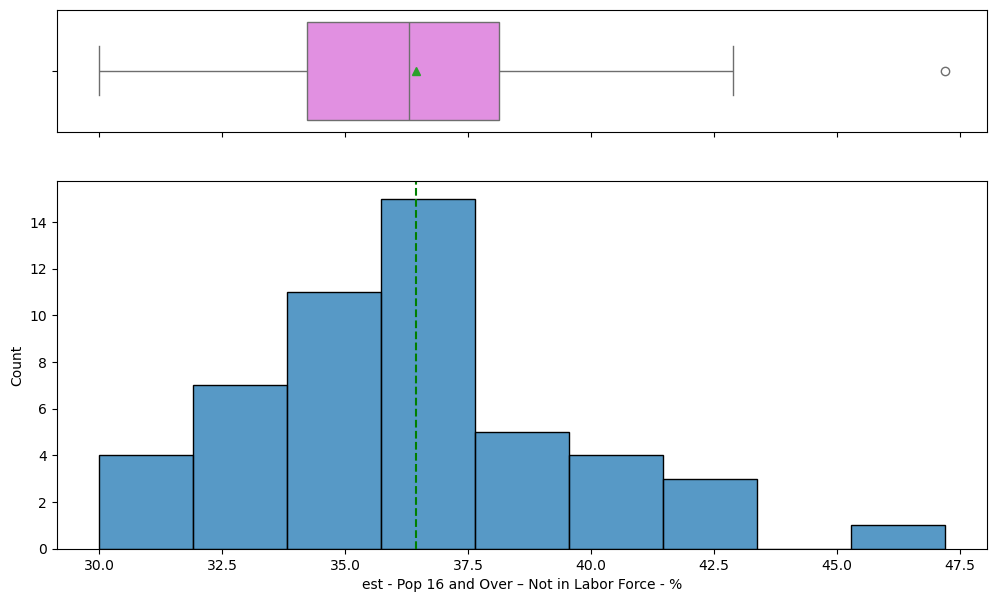

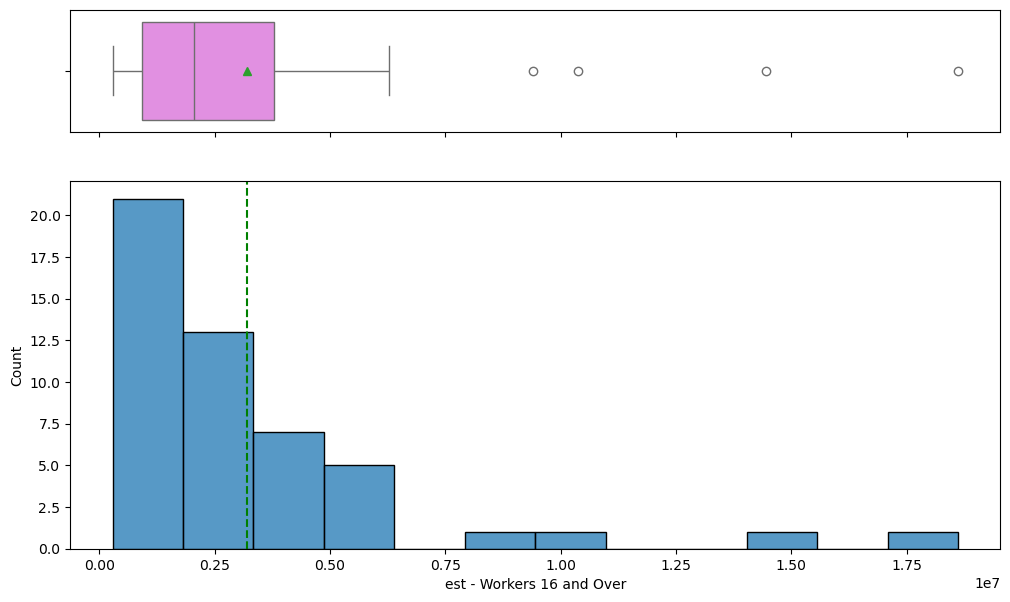

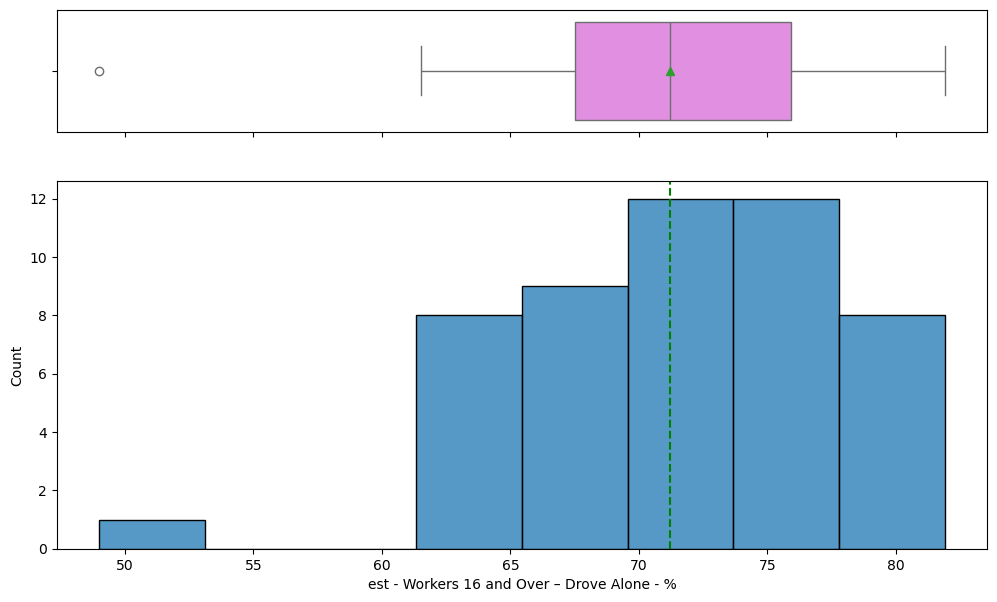

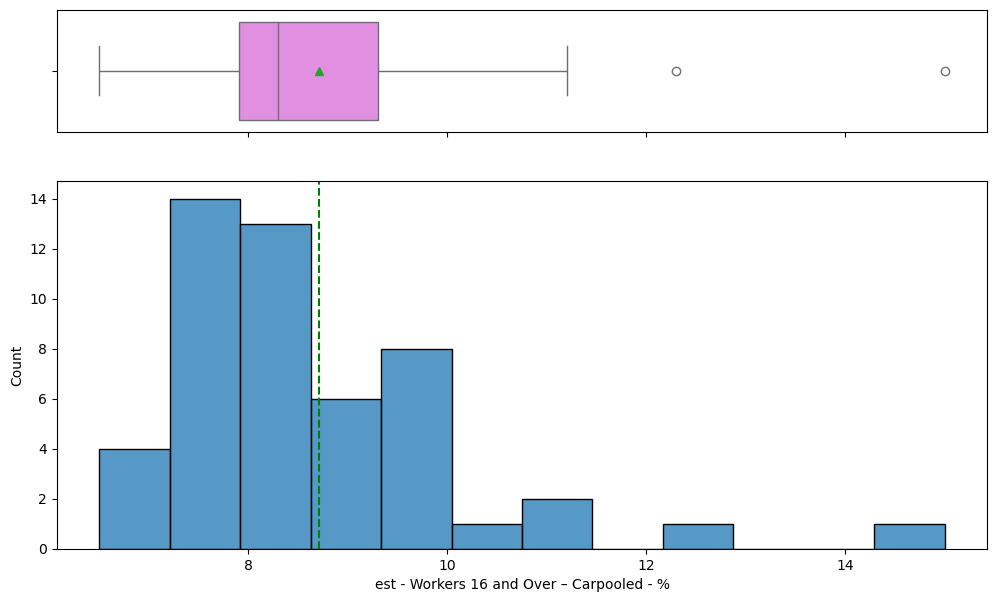

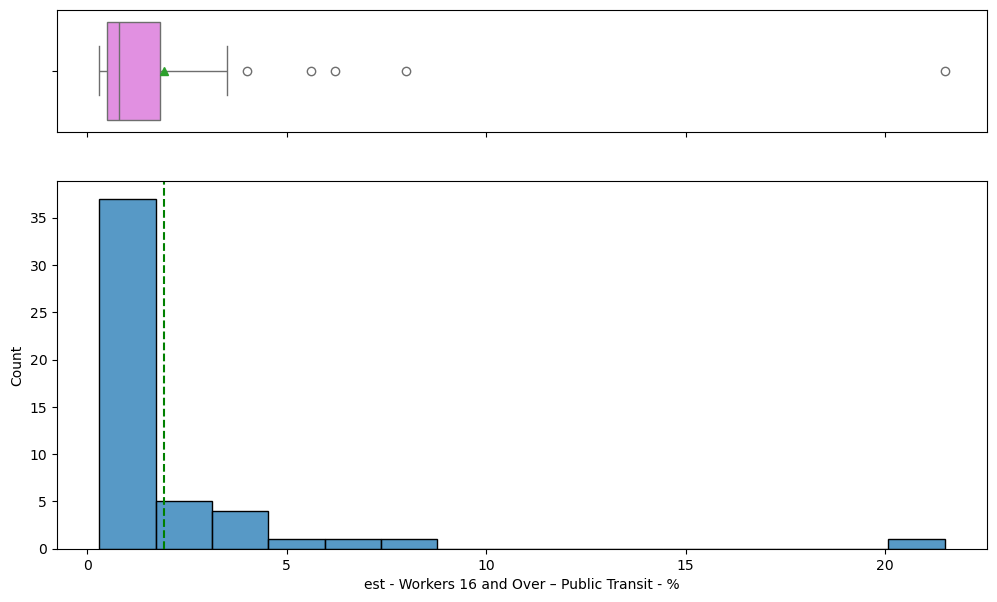

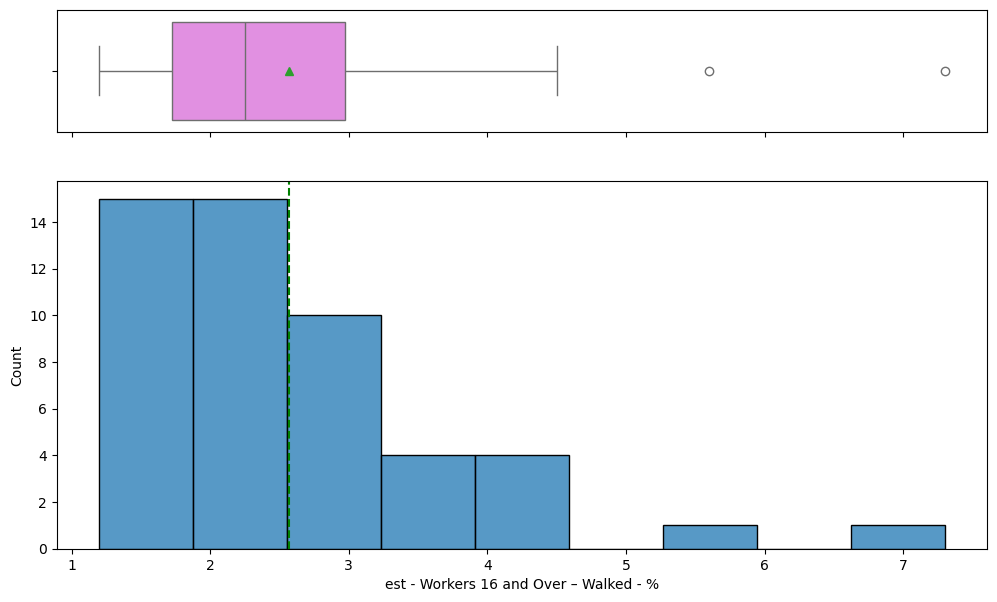

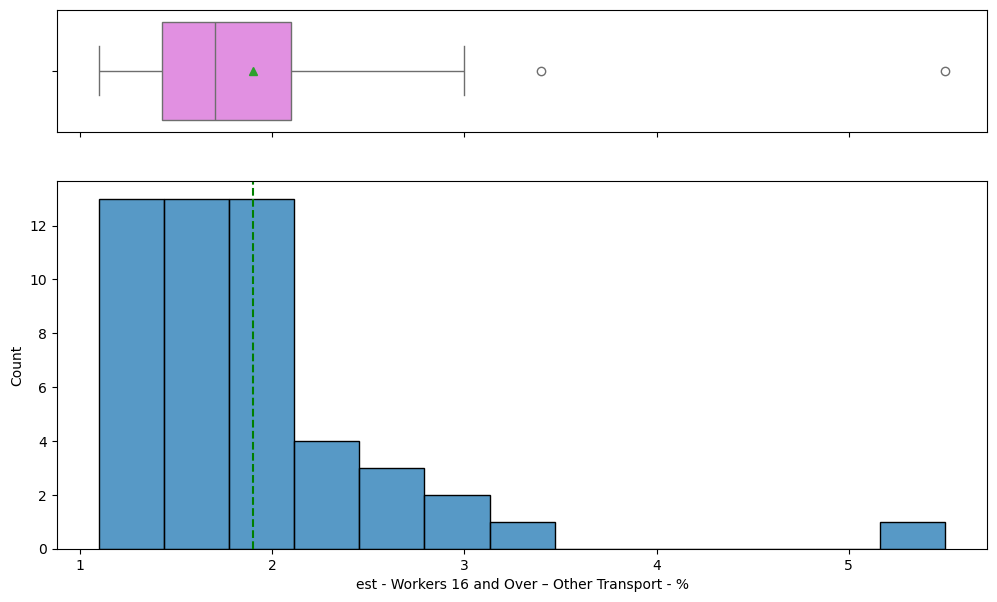

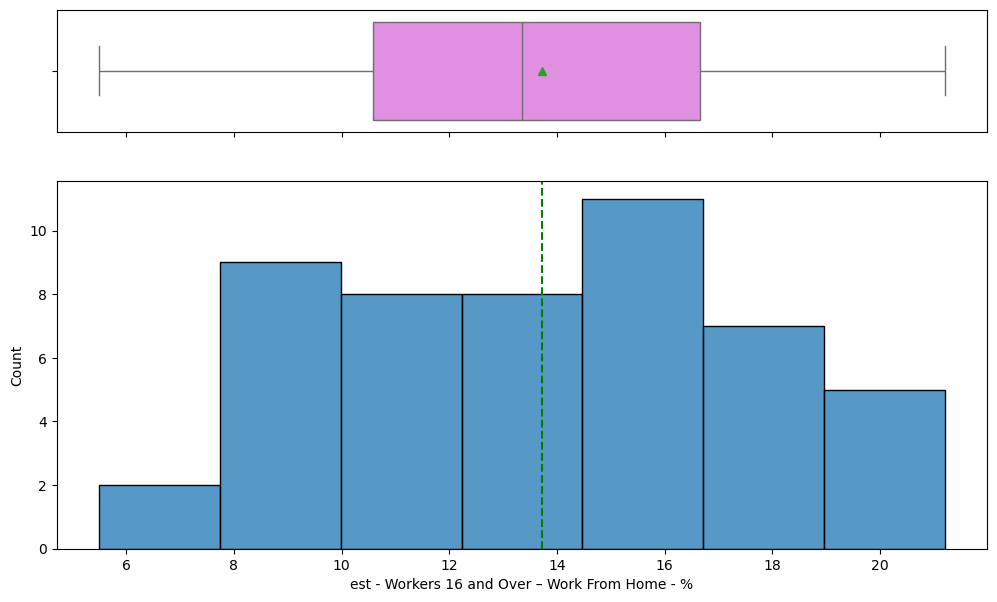

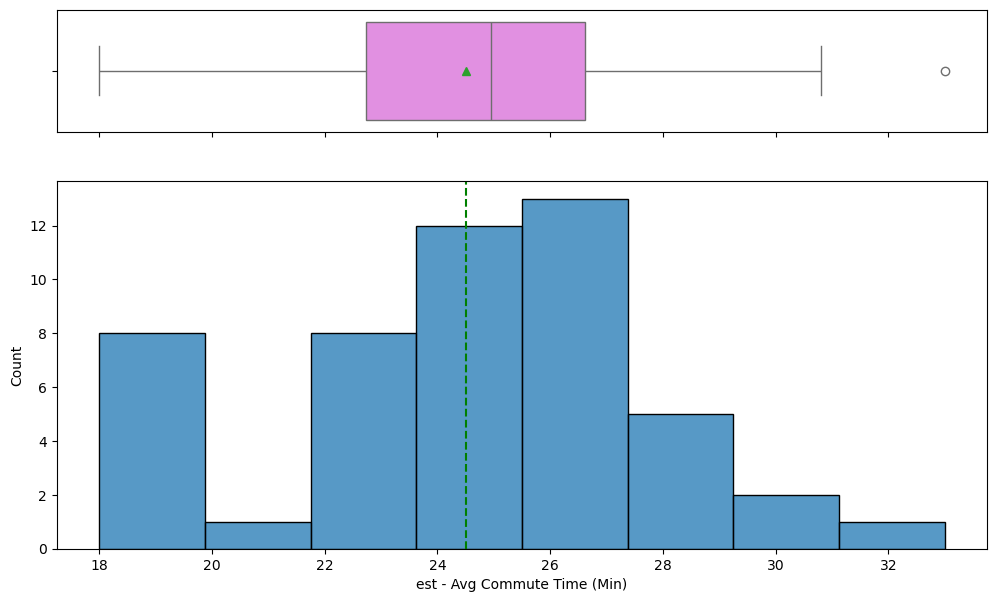

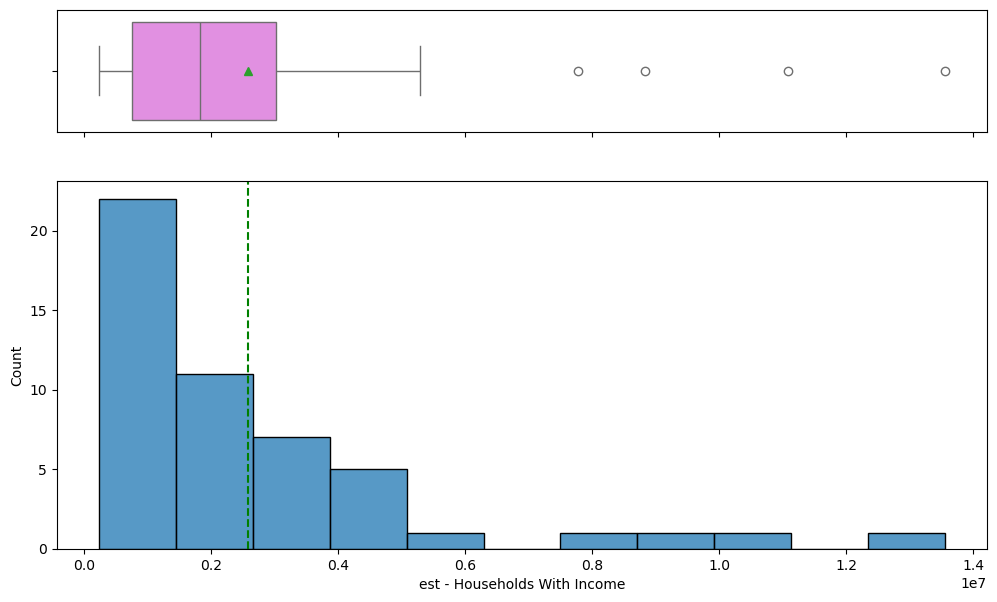

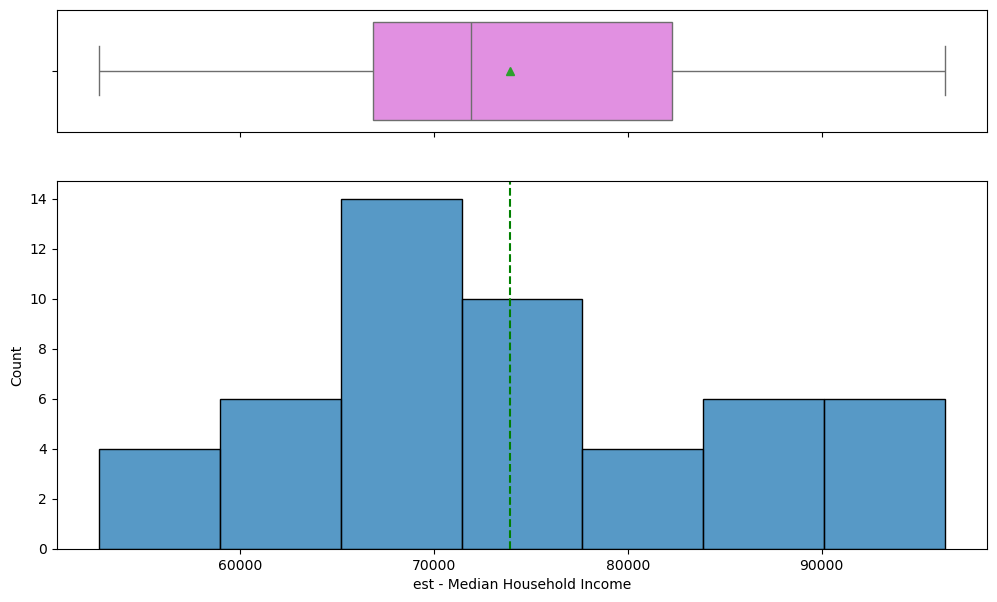

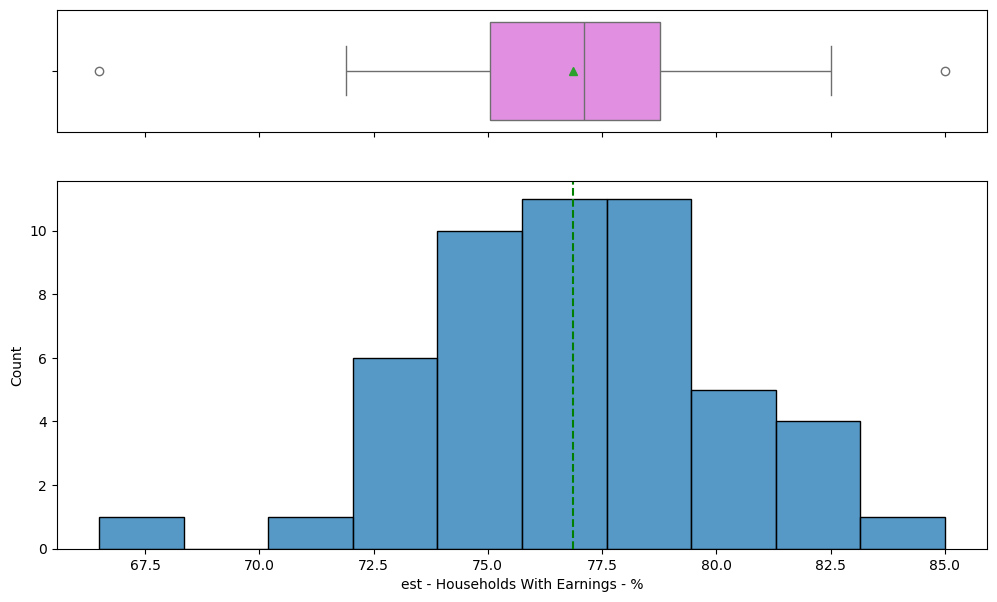

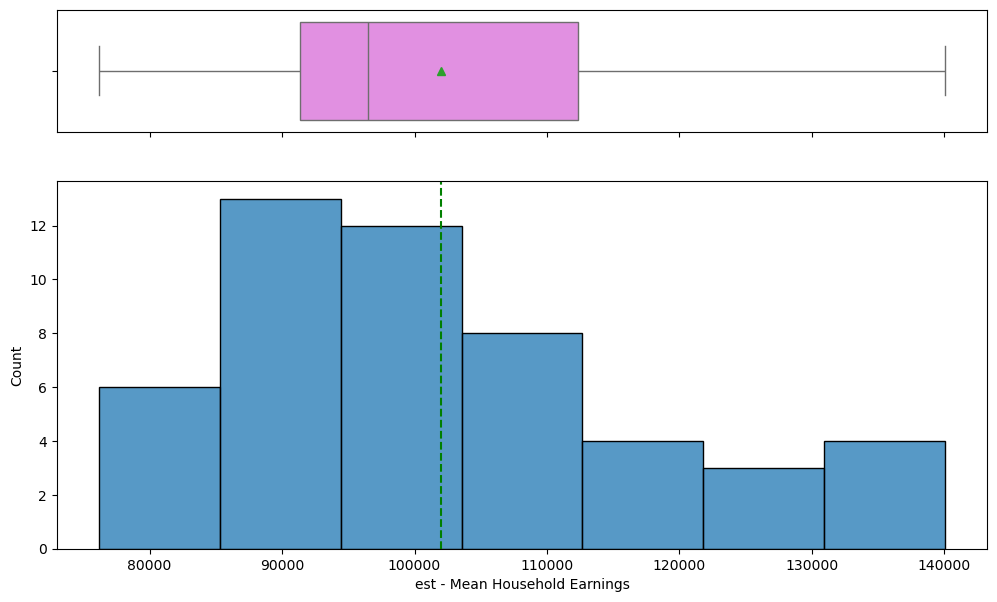

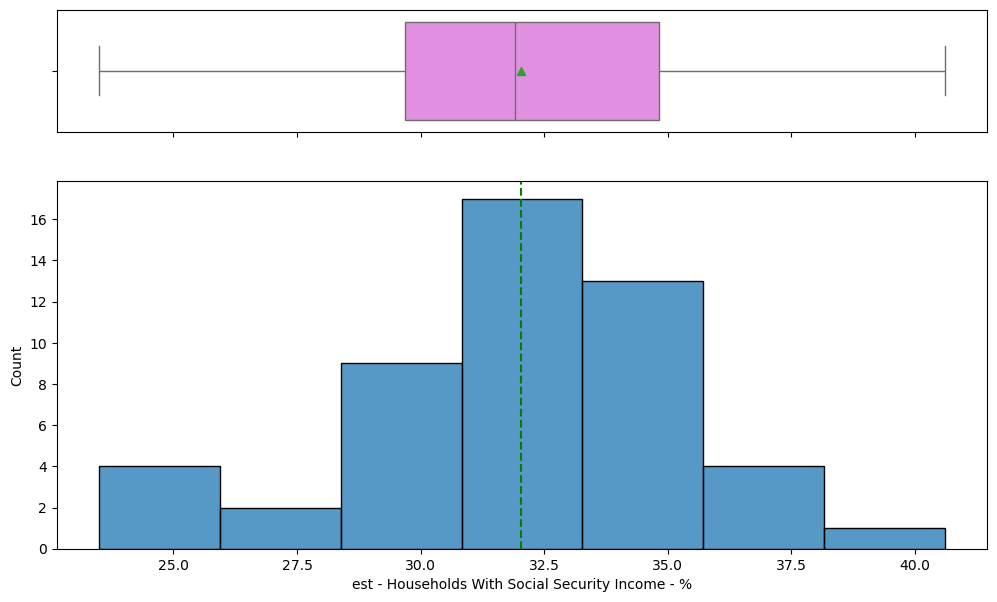

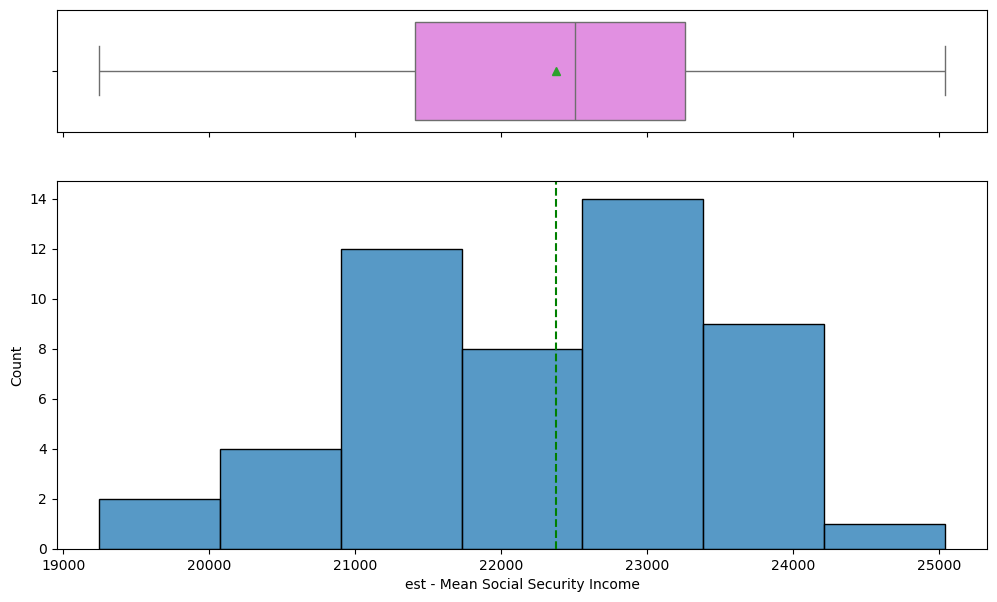

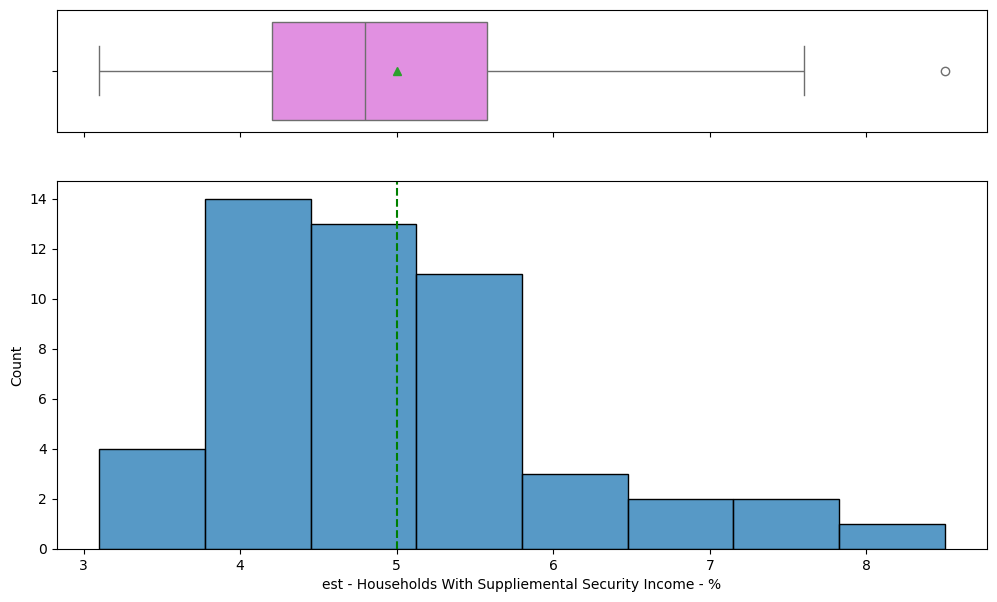

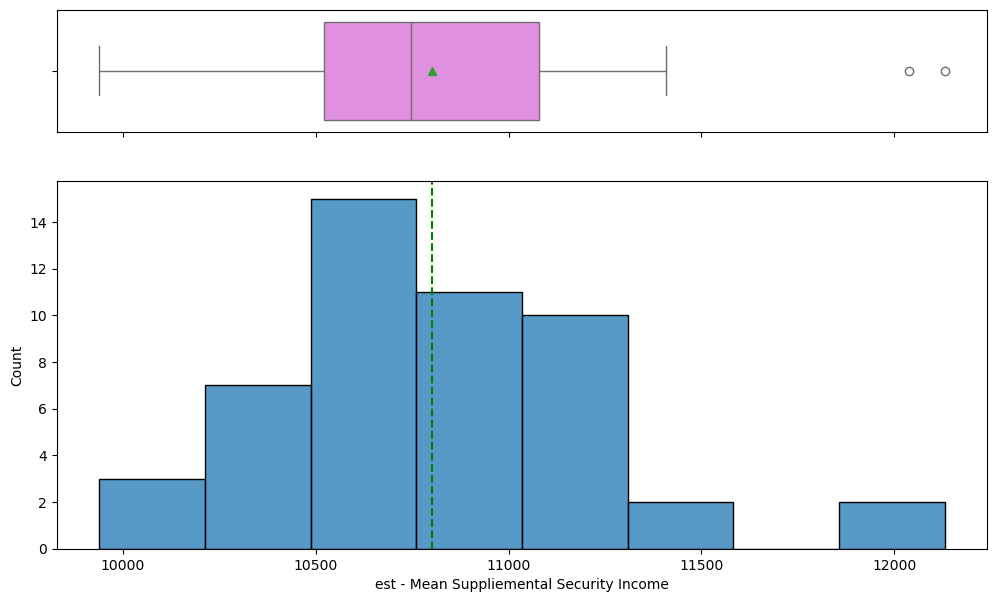

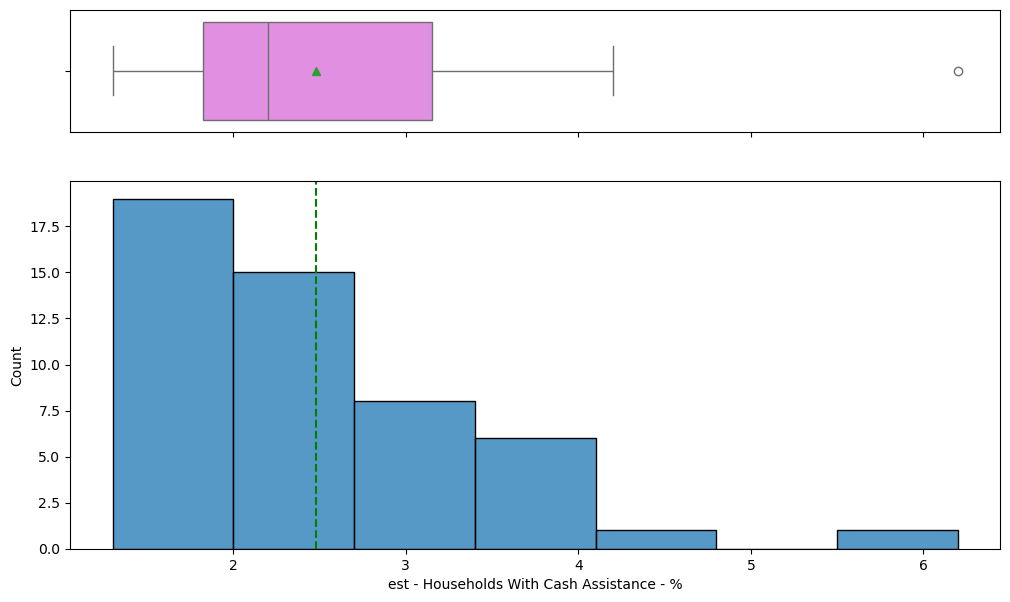

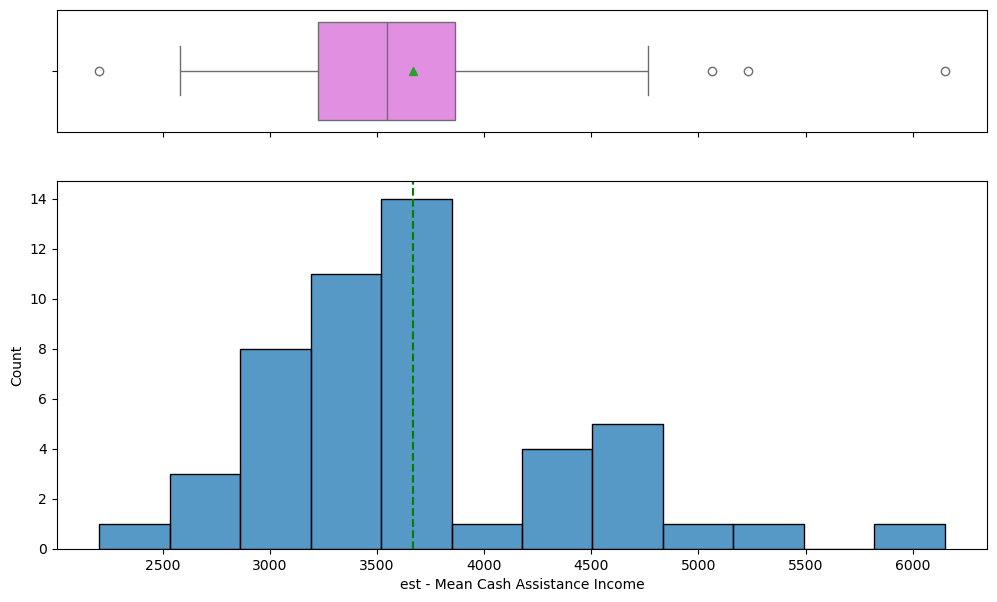

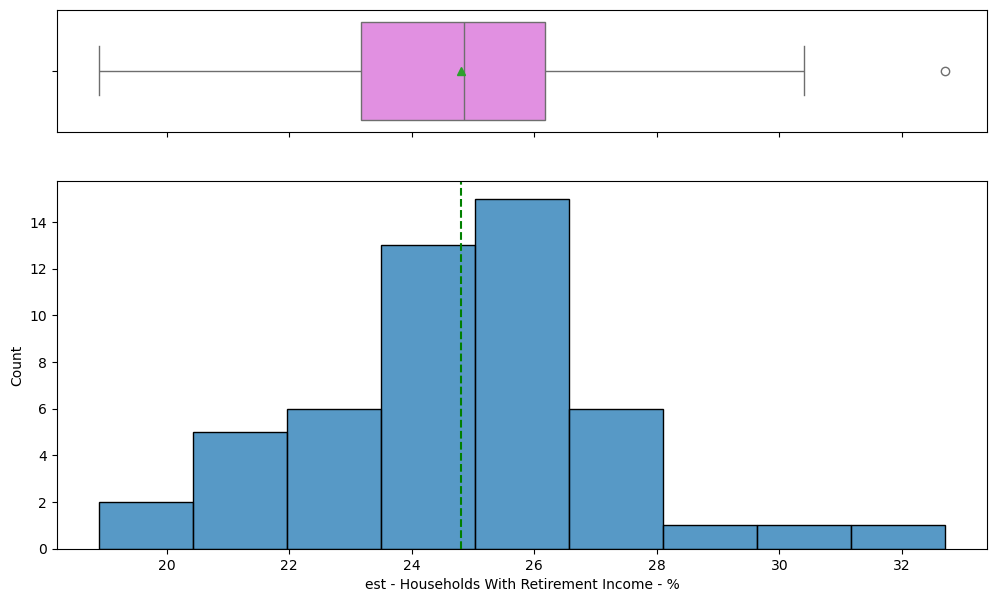

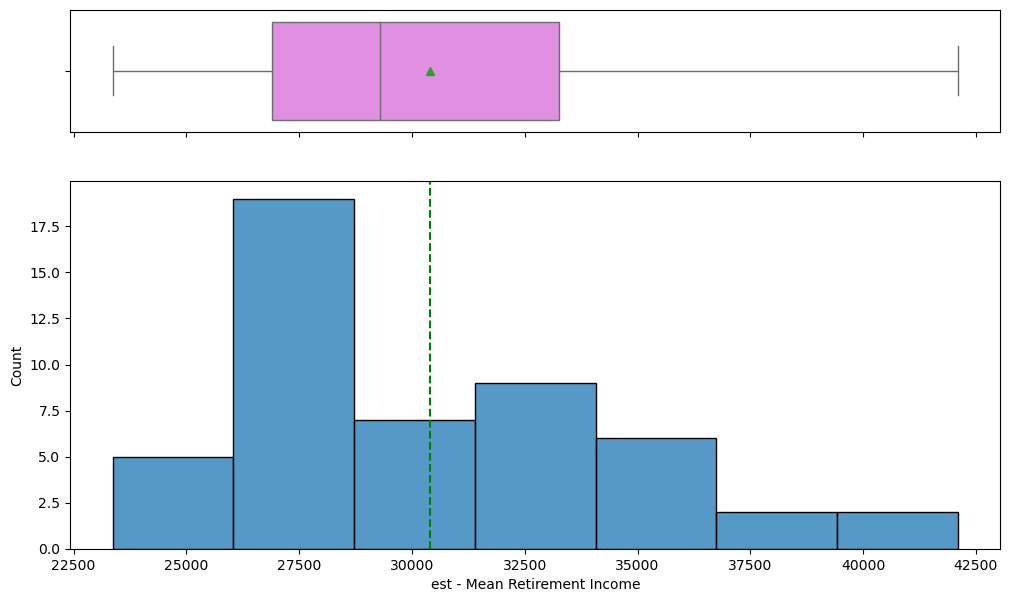

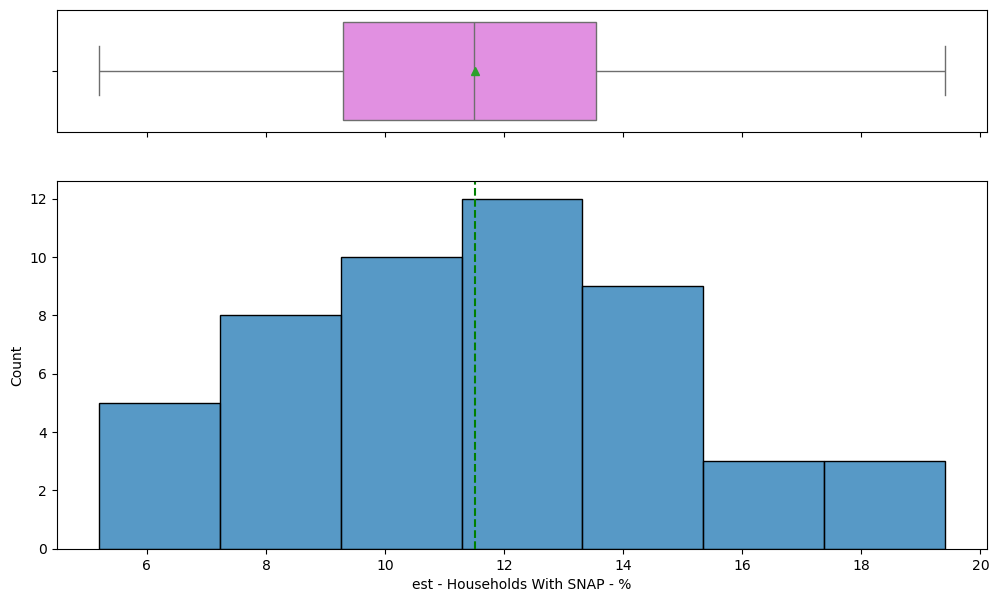

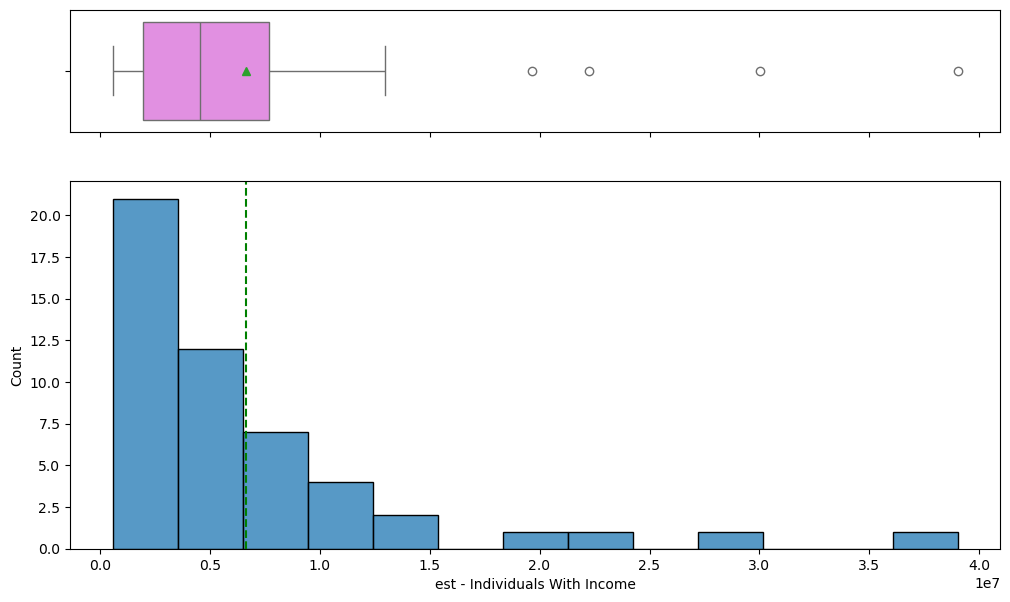

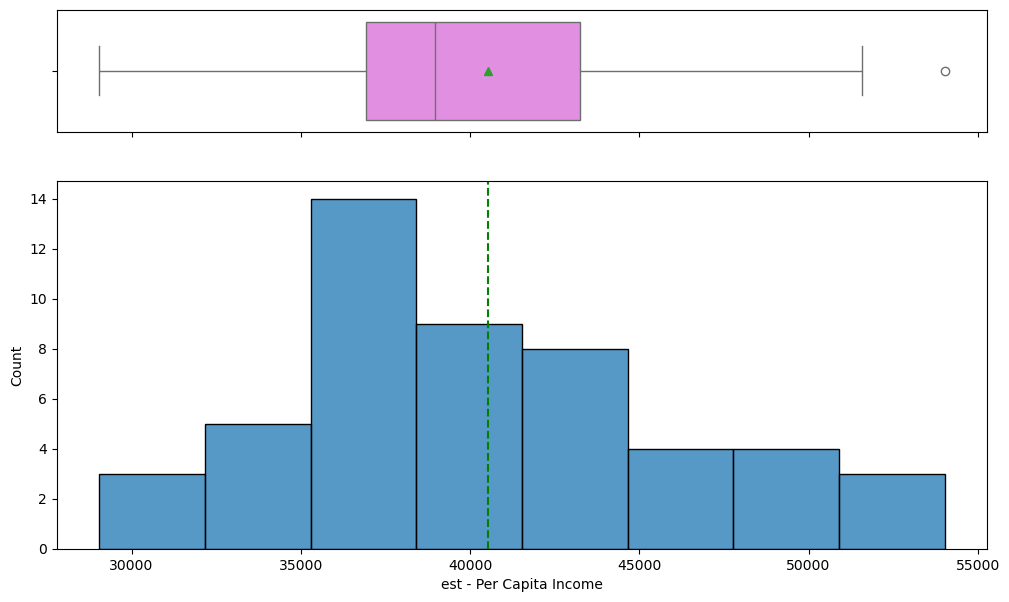

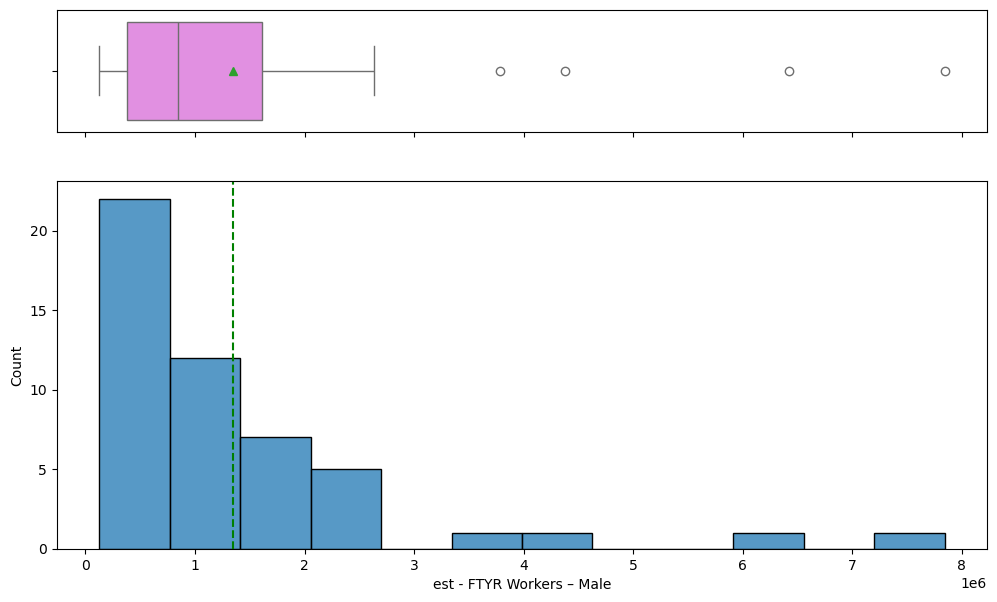

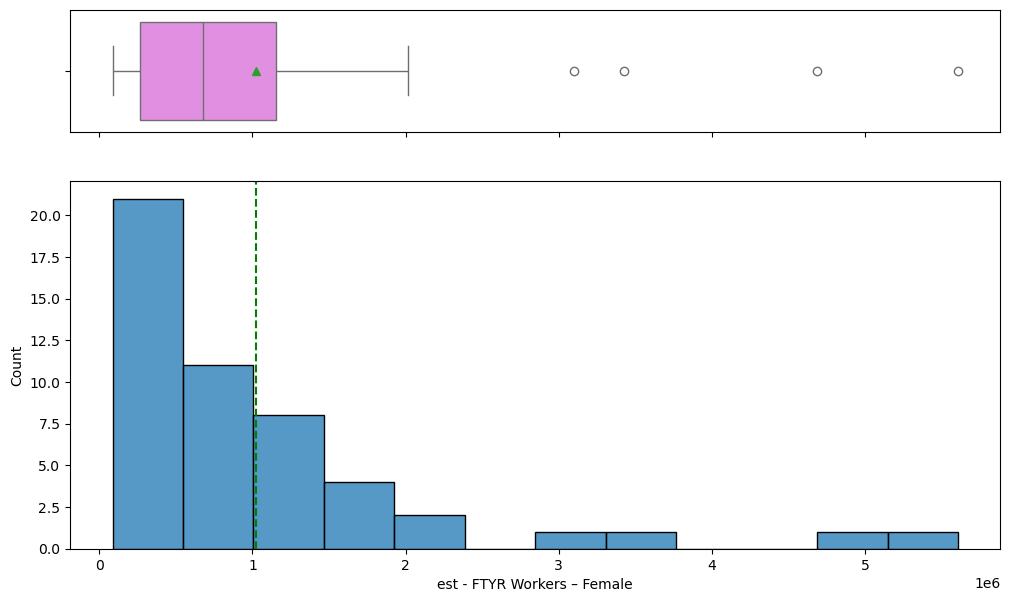

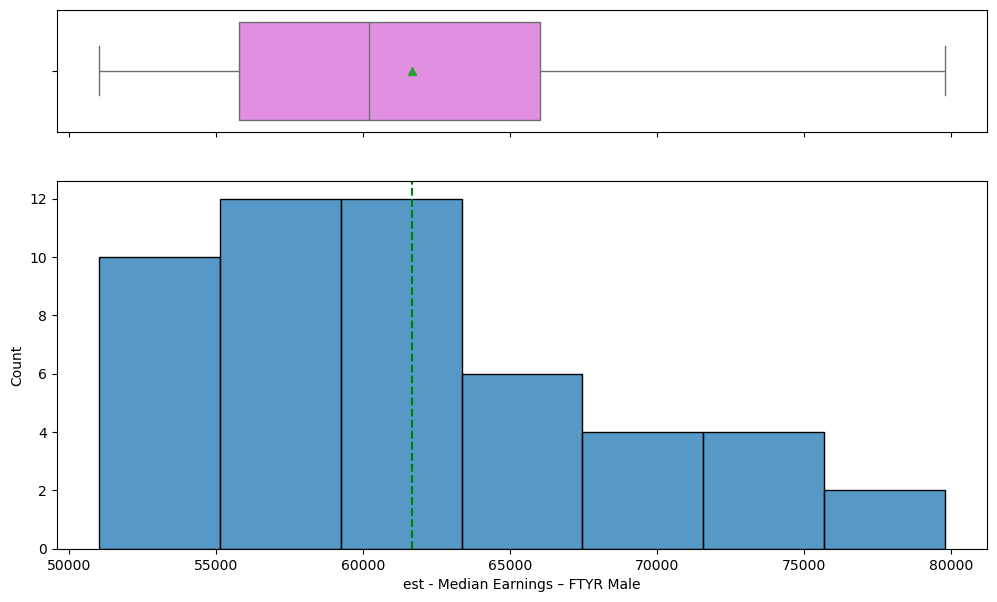

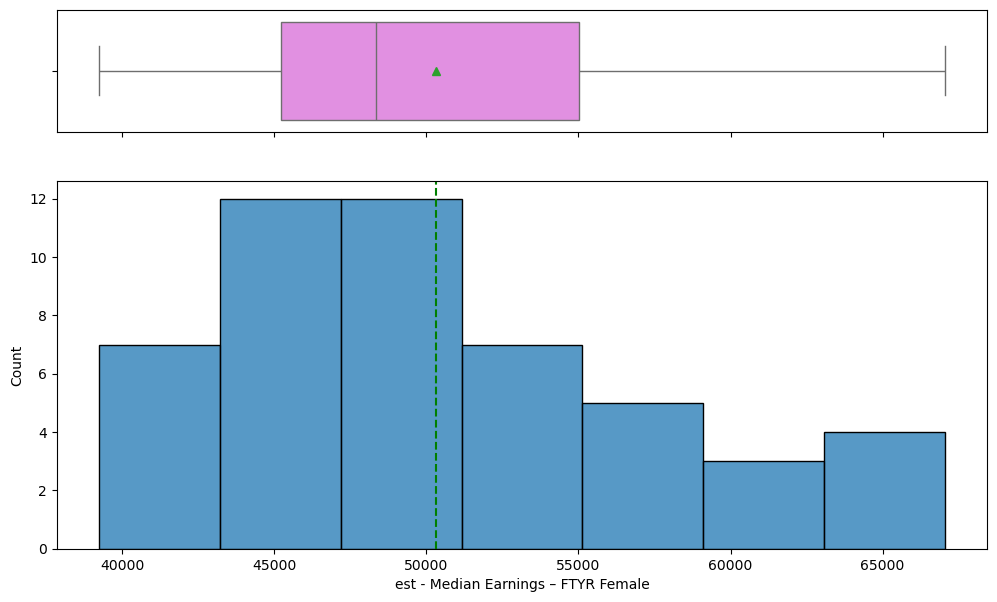

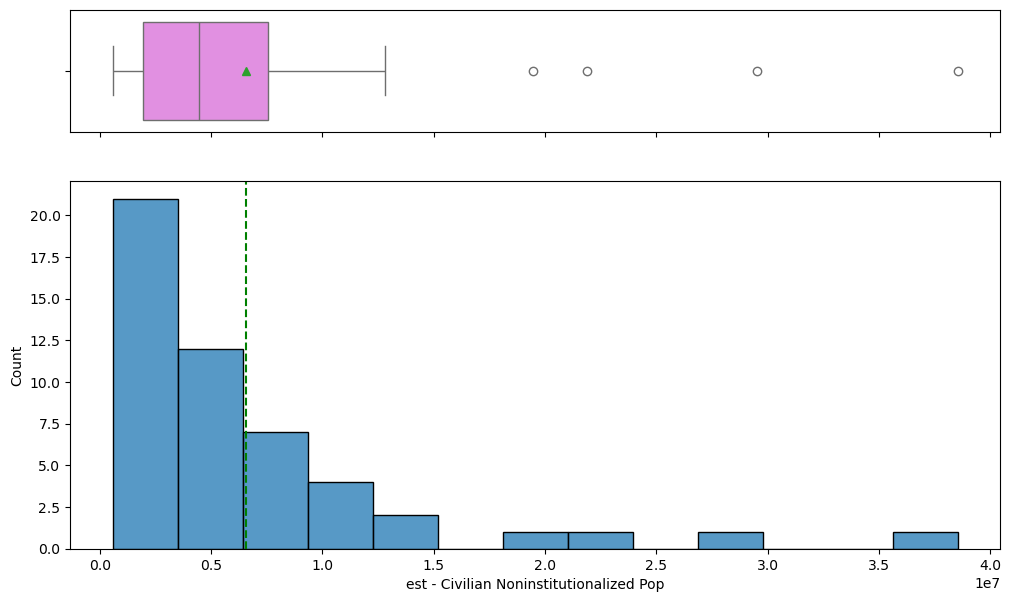

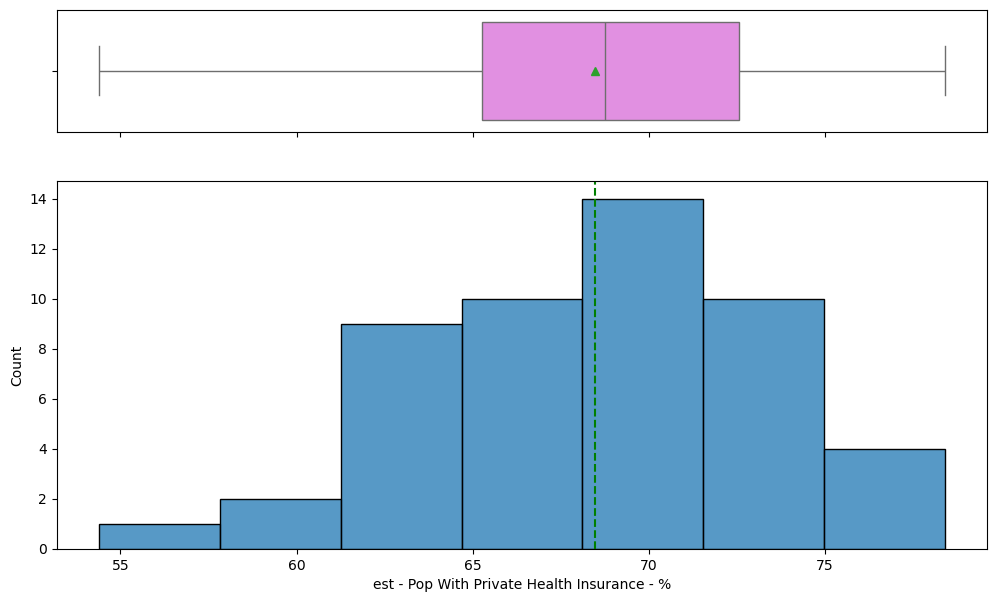

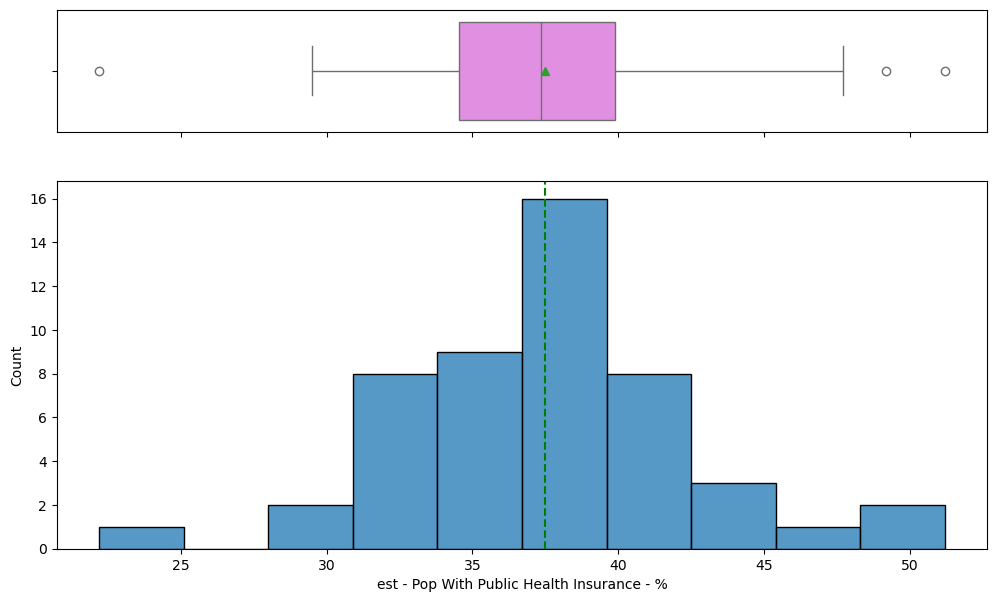

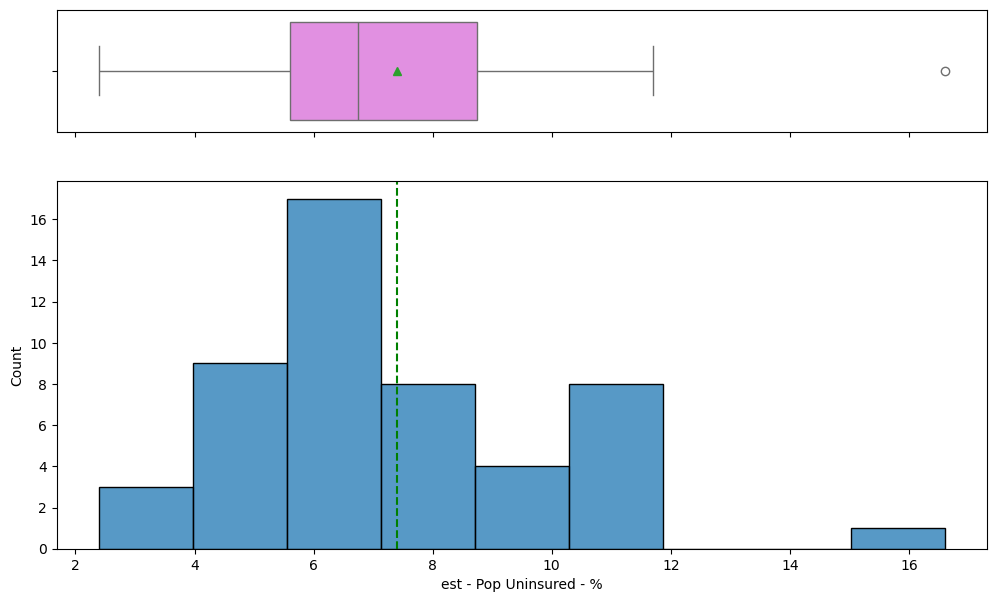

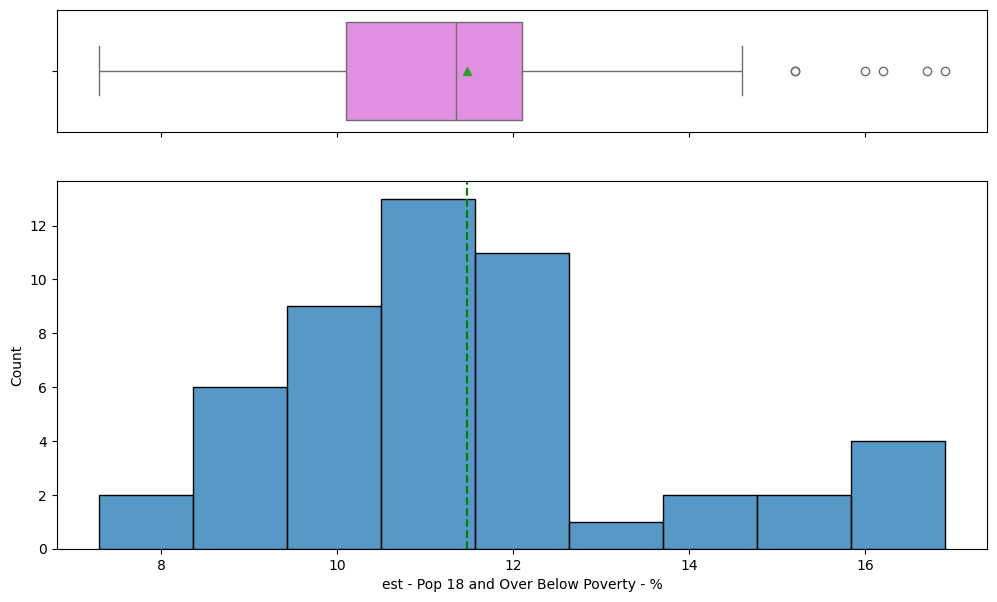

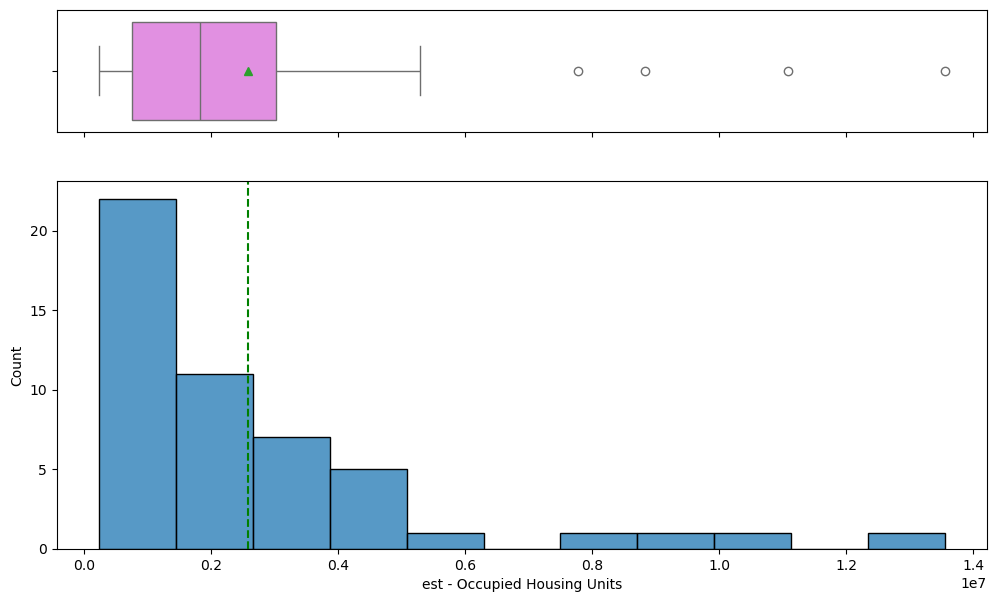

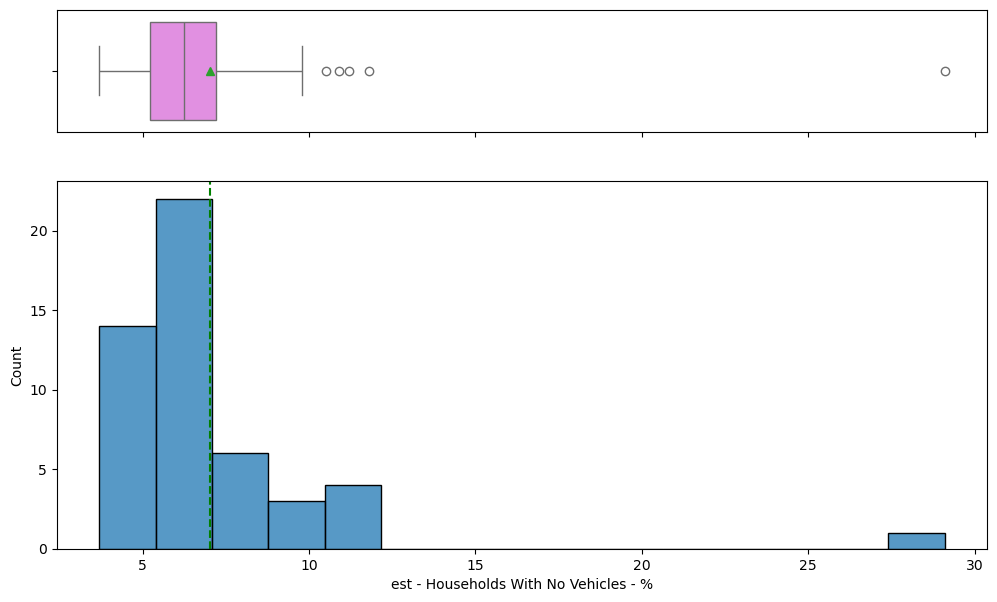

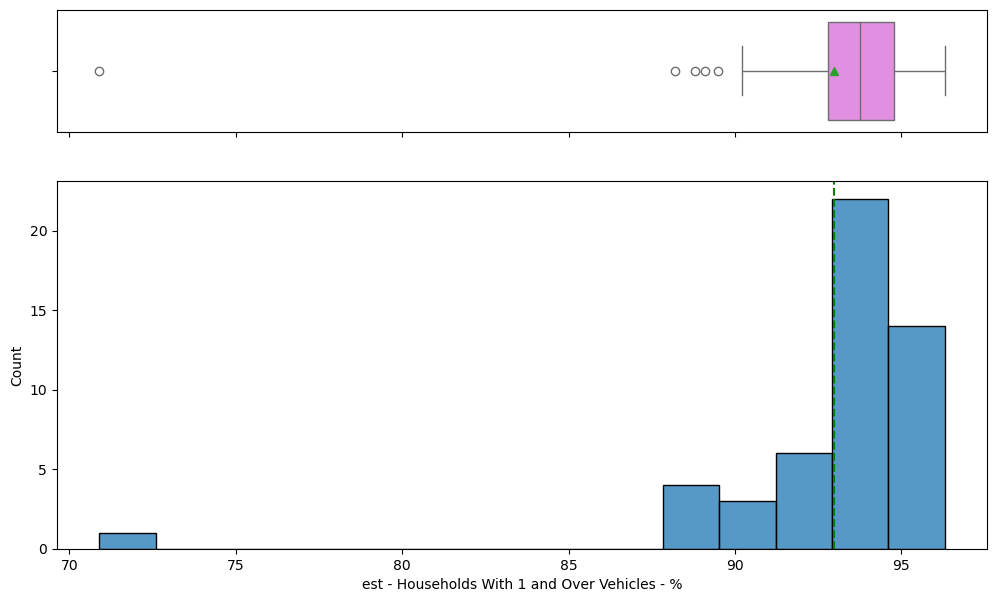

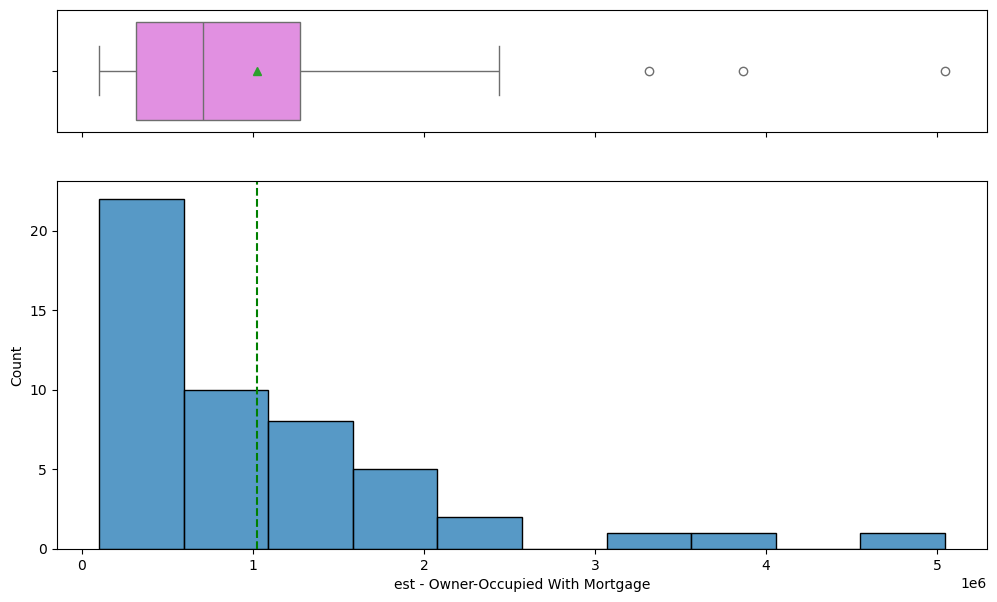

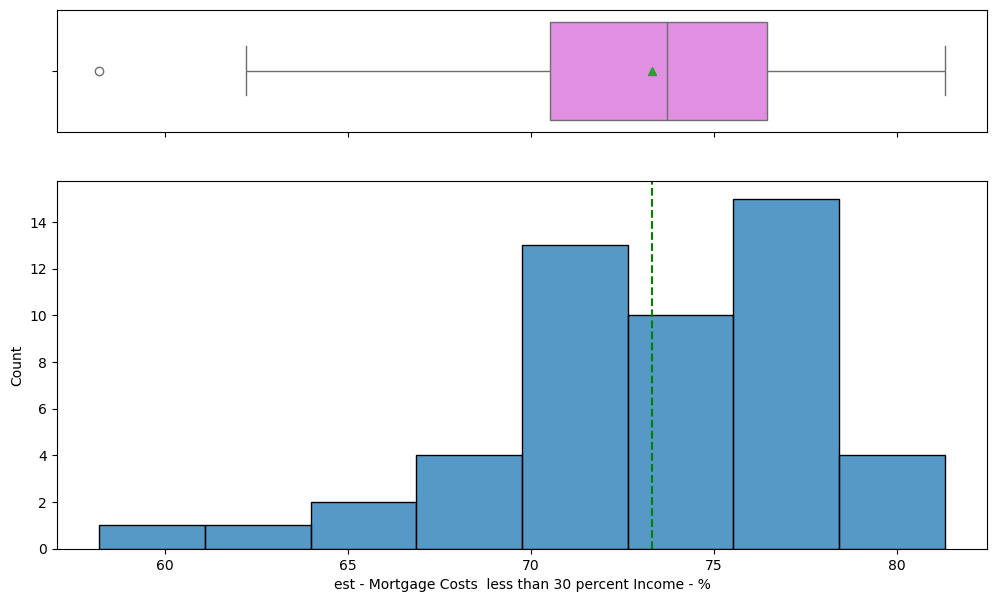

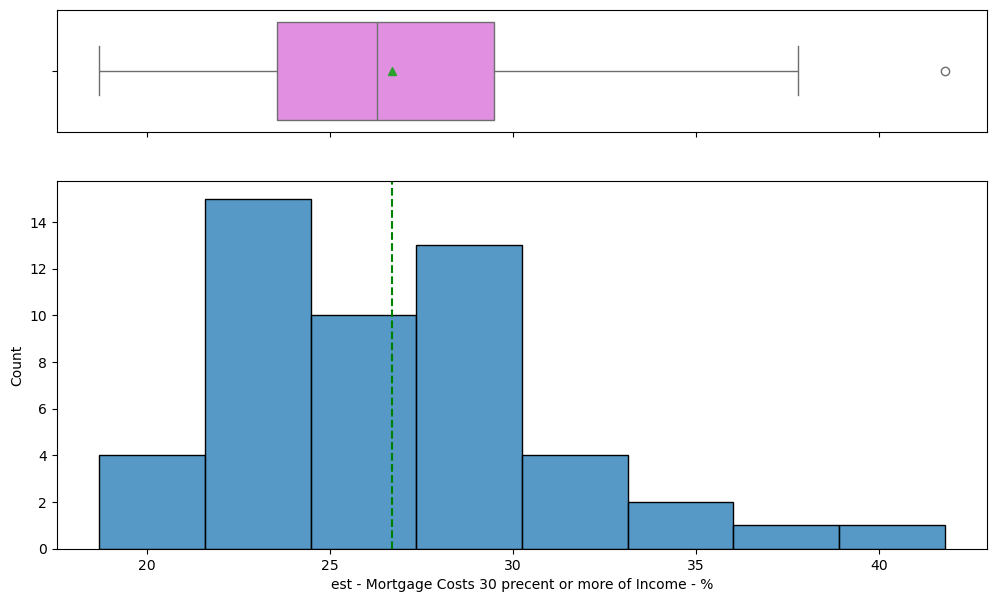

In [82]:
vis_cols = list(df.columns[1:])
for vis in vis_cols:
    histogram_boxplot(df, vis)

## **Univariate Analysis**

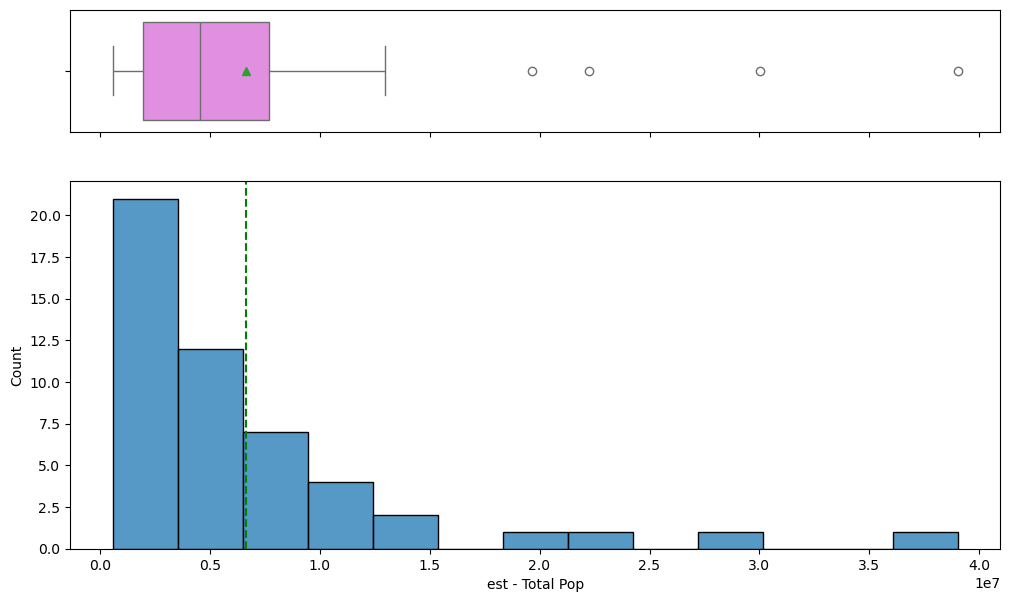

In [60]:
#histogram_boxplot(df, 'est - Total Pop')
